In [1]:
# gpu default 사용량(거의100%)을 줄인 후 데이터 양에 따라 조금씩 증식되게 하는 코드
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
import numpy as np

    random seed로 결과값을 일정하게 출력하고 싶다면
    tessorflow.keras.model이 아닌 keras.model로 import

    ndim -> 차원

In [3]:
x = np.array(5)
x.ndim

0

In [5]:
x = np.array([32, 5, 3, 43, 27])
x.ndim

1

In [6]:
x = np.array([[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], [[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]],
              [[21, 22, 23, 24, 25], [26, 27, 28, 29, 30]]])

x = np.array([[[1, 2, 3, 4, 5], 
               [6, 7, 8, 9, 10]],
              [[11, 12, 13, 14, 15], 
               [16, 17, 18, 19, 20]],
              [[21, 22, 23, 24, 25], 
               [26, 27, 28, 29, 30]]])
x.ndim

3

In [7]:
x.shape

(3, 2, 5)

In [8]:
np.max(x, axis = 0)

array([[21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [9]:
np.argmax(x, axis = 0)

array([[2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2]], dtype=int64)

    shape, reshape

In [10]:
a = np.array([[[5,5,5,5,5], [5,5,5,5,5], [5,5,5,5,5]], 
              [[5,5,5,5,5], [5,5,5,5,5], [5,5,5,5,5]]])
a.shape

(2, 3, 5)

In [11]:
a.reshape((6,5))

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

    ravel(array) : array의 층을 풀어줌 (flatten)
    squeeze : dimension이 1인 부분을 날려줌
    expand_dims(array, axis) : axis기준으로 차원 추가
    stack([array,array, ...], axis)

In [12]:
np.ravel(a)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

In [14]:
np.squeeze([[[1]], [[2]], [[3]]])

array([1, 2, 3])

In [15]:
np.expand_dims([[1], [2], [3]], axis = 0)

array([[[1],
        [2],
        [3]]])

In [17]:
x = [1,2]
y = [3,4]
z = [5,6]

np.stack([x,y,z], axis=0)
# default는 axis = 0

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
np.stack([x,y,z], axis = 1)

array([[1, 3, 5],
       [2, 4, 6]])

    브로드 캐스팅(broad casting)

In [19]:
x = np.array([1,2])
y = np.array(3)

print(x+y)

[4 5]


In [20]:
x = np.array([[1,2], [5,6]])
y = np.array([3,4])

print(x + y)

[[ 4  6]
 [ 8 10]]


In [24]:
x = np.array([[1,2]])
y = np.array([[3],[4]])

print(x + y)

# (1,2)와 (2,1)을 더하면 (2,2)가 됨

[[4 5]
 [5 6]]


    axis 이해하기
    - 0이 가장 안쪽 리스트이며 순차적으로 axis 적용

In [25]:
x = [[1, 2],
    [3, 4]]

In [27]:
# np.mean
print(np.mean(x, axis = 0))
print(np.mean(x, axis = 1))
print(np.mean(x, axis = -1))
print(np.mean(x))

[2. 3.]
[1.5 3.5]
[1.5 3.5]
2.5


In [28]:
# np.sum
print(np.sum(x, axis = 0))
print(np.sum(x, axis = 1))
print(np.sum(x, axis = -1))
print(np.sum(x))

[4 6]
[3 7]
[3 7]
10


In [8]:
# np.argmax
x = [[0, 1, 2],
    [3, 1, 0]]
# 0이 가장 안쪽 리스트
print(np.argmax(x, axis = 0))
print(np.argmax(x, axis = 1))
print(np.argmax(x, axis = -1))
print(np.argmax(x)) # 1차원이라 생각하고 index 반환

[1 0 0]
[2 0]
[2 0]
3


    점곱(dot product)

In [9]:
a = np.array([1,2])
b = np.array([10, 20])

print(np.dot(a,b))
print(a@b)

50
50


In [13]:
a = np.array([[1,2,3],
            [4,5,6]])
b = np.array([[7,9,11],
            [8,10,12]])
c = b.T
print(c)
print(np.dot(a,c))

[[ 7  8]
 [ 9 10]
 [11 12]]
[[ 58  64]
 [139 154]]


# keras 실습(MNIST)

    https://keras.io/getting-started/sequential-model-guide/

In [1]:
import tensorflow as tf
from tensorflow import keras

In [33]:
# 버전 확인

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [2]:
from tensorflow.keras.datasets import mnist

# 1. 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 10s 1us/step


# keras 실습 (Linear, Logistic)

    sgd : Gradient Descent algorithm
    lr : Learning Rate
    epoch : Learning number

 ### Linear (linear는 마지막층에 활성화 함수가 필요 없음)

In [87]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x_train = np.array([1, 2, 3])
y_train = np.array([1, 2, 3])

model = Sequential()
model.add(Dense(1, input_dim=1)) # 선형회귀이므로 퍼셉트론 하나만 사용으로 충분

sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd) # mse로 성능 최적화를 시키겟다는 뜻

# prints summary of the model to the terminal
model.summary()

model.fit(x_train, y_train, epochs=200)

y_predict = model.predict(np.array([5]))
print(y_predict)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
3/3 [==============================] - 5s 2s/sample - loss: 20.6810
Epoch 2/200
3/3 [==============================] - 0s 650us/sample - loss: 0.3283
Epoch 3/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0813
Epoch 4/200
3/3 [==============================] - 0s 654us/sample - loss: 0.0747
Epoch 5/200
3/3 [==============================] - 0s 997us/sample - loss: 0.0711
Epoch 6/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0677
Epoch 7/200
3/3 [=

Epoch 85/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0014
Epoch 86/200
3/3 [==============================] - 0s 664us/sample - loss: 0.0014
Epoch 87/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0013
Epoch 88/200
3/3 [==============================] - 0s 664us/sample - loss: 0.0013
Epoch 89/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0012
Epoch 90/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0011
Epoch 91/200
3/3 [==============================] - 0s 664us/sample - loss: 0.0011
Epoch 92/200
3/3 [==============================] - 0s 665us/sample - loss: 0.0010
Epoch 93/200
3/3 [==============================] - 0s 664us/sample - loss: 9.8149e-04
Epoch 94/200
3/3 [==============================] - 0s 666us/sample - loss: 9.3487e-04
Epoch 95/200
3/3 [==============================] - 0s 997us/sample - loss: 8.9047e-04
Epoch 96/200
3/3 [==============================] - 0s 665us/sample - loss:

Epoch 179/200
3/3 [==============================] - 0s 664us/sample - loss: 1.4937e-05
Epoch 180/200
3/3 [==============================] - 0s 665us/sample - loss: 1.4227e-05
Epoch 181/200
3/3 [==============================] - 0s 665us/sample - loss: 1.3551e-05
Epoch 182/200
3/3 [==============================] - 0s 664us/sample - loss: 1.2907e-05
Epoch 183/200
3/3 [==============================] - 0s 665us/sample - loss: 1.2294e-05
Epoch 184/200
3/3 [==============================] - 0s 665us/sample - loss: 1.1711e-05
Epoch 185/200
3/3 [==============================] - 0s 333us/sample - loss: 1.1154e-05
Epoch 186/200
3/3 [==============================] - 0s 665us/sample - loss: 1.0625e-05
Epoch 187/200
3/3 [==============================] - 0s 997us/sample - loss: 1.0120e-05
Epoch 188/200
3/3 [==============================] - 0s 665us/sample - loss: 9.6389e-06
Epoch 189/200
3/3 [==============================] - 0s 665us/sample - loss: 9.1812e-06
Epoch 190/200
3/3 [=============

In [145]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x_data = np.array([[73., 80., 75.],
                   [93., 88., 93.],
                   [89., 91., 90.],
                   [96., 98., 100.],
                   [73., 66., 70.]])
y_data = np.array([[152.],
                   [185.],
                   [180.],
                   [196.],
                   [142.]])
# y_data = np.array([152., 185., 180., 196., 142.])
# y값은 둘중 어떻게 넣든 상관없음 -> 출력도 같은 차원의 array로 나옴
# x값의 구분이 중요

model = Sequential()
model.add(Dense(1, input_dim=3)) # 선형회귀이므로 퍼셉트론 하나만 사용으로 충분
                                 # dims = feature의 갯수

sgd = SGD(lr=1e-5)
model.compile(loss='mse', optimizer=sgd) # mse로 성능 최적화를 시키겟다는 뜻

# prints summary of the model to the terminal
model.summary()

model.fit(x_data, y_data, epochs=2000)

# test = np.array([ ]) 한 다음
# model.predict(np.expand_dims(test, axis = 0)) 해도 돔
y_predict = model.predict(np.array([[80, 78, 91],
                                   [89., 91., 90.]]))
print(y_predict)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
5/5 [==============================] - 1s 182ms/sample - loss: 121539.0391
Epoch 2/2000
5/5 [==============================] - 0s 393us/sample - loss: 38096.9219
Epoch 3/2000
5/5 [==============================] - 0s 598us/sample - loss: 11942.2461
Epoch 4/2000
5/5 [==============================] - 0s 390us/sample - loss: 3744.1460
Epoch 5/2000
5/5 [==============================] - 0s 398us/sample - loss: 1174.4766
Epoch 6/2000
5/5 [==============================] - 0s 399us/sample - loss: 369.0208
Epoch 7/2000
5/5 [==============================] - 0s 398us/sample - loss: 116.5529
Epoch 8/2000
5/5 [==============================] - 0s 597us/sample - lo

Epoch 93/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2376
Epoch 94/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2370
Epoch 95/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2365
Epoch 96/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.2359
Epoch 97/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2353
Epoch 98/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.2347
Epoch 99/2000
5/5 [==============================] - 0s 398us/sample - loss: 1.2341
Epoch 100/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2336
Epoch 101/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2330
Epoch 102/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.2324
Epoch 103/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.2318
Epoch 104/2000
5/5 [==============================] - 0s 598us/sample - 

Epoch 190/2000
5/5 [==============================] - 0s 798us/sample - loss: 1.1828
Epoch 191/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1822
Epoch 192/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1817
Epoch 193/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1811
Epoch 194/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1806
Epoch 195/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1800
Epoch 196/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1795
Epoch 197/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1789
Epoch 198/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1784
Epoch 199/2000
5/5 [==============================] - 0s 599us/sample - loss: 1.1778
Epoch 200/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1773
Epoch 201/2000
5/5 [==============================] - 0s 399us/sa

Epoch 287/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1308
Epoch 288/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1302
Epoch 289/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1297
Epoch 290/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1292
Epoch 291/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1287
Epoch 292/2000
5/5 [==============================] - 0s 599us/sample - loss: 1.1282
Epoch 293/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1276
Epoch 294/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1271
Epoch 295/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.1266
Epoch 296/2000
5/5 [==============================] - 0s 599us/sample - loss: 1.1261
Epoch 297/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.1256
Epoch 298/2000
5/5 [==============================] - 0s 399us/sa

Epoch 384/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0814
Epoch 385/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0809
Epoch 386/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.0804
Epoch 387/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0799
Epoch 388/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0794
Epoch 389/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.0789
Epoch 390/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.0784
Epoch 391/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0779
Epoch 392/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0774
Epoch 393/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.0770
Epoch 394/2000
5/5 [==============================] - 0s 798us/sample - loss: 1.0765
Epoch 395/2000
5/5 [==============================] - 0s 598us/sa

Epoch 481/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0346
Epoch 482/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0341
Epoch 483/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0336
Epoch 484/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0332
Epoch 485/2000
5/5 [==============================] - 0s 399us/sample - loss: 1.0327
Epoch 486/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0322
Epoch 487/2000
5/5 [==============================] - 0s 599us/sample - loss: 1.0318
Epoch 488/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0313
Epoch 489/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0308
Epoch 490/2000
5/5 [==============================] - 0s 599us/sample - loss: 1.0304
Epoch 491/2000
5/5 [==============================] - 0s 598us/sample - loss: 1.0299
Epoch 492/2000
5/5 [==============================] - 0s 599us/sa

Epoch 578/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.9902
Epoch 579/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9897
Epoch 580/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9893
Epoch 581/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9888
Epoch 582/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9884
Epoch 583/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.9879
Epoch 584/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9875
Epoch 585/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9870
Epoch 586/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9866
Epoch 587/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9862
Epoch 588/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.9857
Epoch 589/2000
5/5 [==============================] - 0s 598us/sa

Epoch 675/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9480
Epoch 676/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9476
Epoch 677/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9472
Epoch 678/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9467
Epoch 679/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9463
Epoch 680/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9459
Epoch 681/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9455
Epoch 682/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9450
Epoch 683/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9446
Epoch 684/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.9442
Epoch 685/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9438
Epoch 686/2000
5/5 [==============================] - 0s 598us/sa

Epoch 772/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9080
Epoch 773/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9076
Epoch 774/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9072
Epoch 775/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9068
Epoch 776/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.9064
Epoch 777/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9060
Epoch 778/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9056
Epoch 779/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9052
Epoch 780/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9048
Epoch 781/2000
5/5 [==============================] - 0s 798us/sample - loss: 0.9044
Epoch 782/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.9040
Epoch 783/2000
5/5 [==============================] - 0s 598us/sa

Epoch 869/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8701
Epoch 870/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8697
Epoch 871/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8693
Epoch 872/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8689
Epoch 873/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8685
Epoch 874/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8681
Epoch 875/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8678
Epoch 876/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8674
Epoch 877/2000
5/5 [==============================] - 0s 798us/sample - loss: 0.8670
Epoch 878/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8666
Epoch 879/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8663
Epoch 880/2000
5/5 [==============================] - 0s 598us/sa

Epoch 966/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8340
Epoch 967/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8337
Epoch 968/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8333
Epoch 969/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8330
Epoch 970/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8326
Epoch 971/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8322
Epoch 972/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8319
Epoch 973/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8315
Epoch 974/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8312
Epoch 975/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8308
Epoch 976/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.8304
Epoch 977/2000
5/5 [==============================] - 0s 599us/sa

Epoch 1062/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.8002
Epoch 1063/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7999
Epoch 1064/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7996
Epoch 1065/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7992
Epoch 1066/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7989
Epoch 1067/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7985
Epoch 1068/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7982
Epoch 1069/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7978
Epoch 1070/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7975
Epoch 1071/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7972
Epoch 1072/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7968
Epoch 1073/2000
5/5 [==============================] -

Epoch 1158/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.7681
Epoch 1159/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7678
Epoch 1160/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7675
Epoch 1161/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7672
Epoch 1162/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7668
Epoch 1163/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7665
Epoch 1164/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7662
Epoch 1165/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7659
Epoch 1166/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7655
Epoch 1167/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7652
Epoch 1168/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7649
Epoch 1169/2000
5/5 [==============================] -

Epoch 1254/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7377
Epoch 1255/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7373
Epoch 1256/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7370
Epoch 1257/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7367
Epoch 1258/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7364
Epoch 1259/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7361
Epoch 1260/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7358
Epoch 1261/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7355
Epoch 1262/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7352
Epoch 1263/2000
5/5 [==============================] - 0s 596us/sample - loss: 0.7349
Epoch 1264/2000
5/5 [==============================] - 0s 597us/sample - loss: 0.7346
Epoch 1265/2000
5/5 [==============================] -

Epoch 1350/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7087
Epoch 1351/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7084
Epoch 1352/2000
5/5 [==============================] - 0s 398us/sample - loss: 0.7081
Epoch 1353/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7079
Epoch 1354/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7076
Epoch 1355/2000
5/5 [==============================] - 0s 398us/sample - loss: 0.7073
Epoch 1356/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.7070
Epoch 1357/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.7067
Epoch 1358/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7064
Epoch 1359/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7061
Epoch 1360/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.7058
Epoch 1361/2000
5/5 [==============================] -

Epoch 1446/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6813
Epoch 1447/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6810
Epoch 1448/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6807
Epoch 1449/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6804
Epoch 1450/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6802
Epoch 1451/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6799
Epoch 1452/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6796
Epoch 1453/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6793
Epoch 1454/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6790
Epoch 1455/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6788
Epoch 1456/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6785
Epoch 1457/2000
5/5 [==============================] -

Epoch 1542/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6552
Epoch 1543/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6549
Epoch 1544/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6547
Epoch 1545/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6544
Epoch 1546/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6542
Epoch 1547/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6539
Epoch 1548/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6536
Epoch 1549/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6533
Epoch 1550/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6531
Epoch 1551/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6528
Epoch 1552/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6526
Epoch 1553/2000
5/5 [==============================] -

Epoch 1638/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6305
Epoch 1639/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6302
Epoch 1640/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6299
Epoch 1641/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6297
Epoch 1642/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6294
Epoch 1643/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6292
Epoch 1644/2000
5/5 [==============================] - 0s 798us/sample - loss: 0.6289
Epoch 1645/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6287
Epoch 1646/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6284
Epoch 1647/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6282
Epoch 1648/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6280
Epoch 1649/2000
5/5 [==============================] -

Epoch 1734/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6070
Epoch 1735/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6067
Epoch 1736/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6065
Epoch 1737/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6062
Epoch 1738/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6060
Epoch 1739/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6058
Epoch 1740/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6055
Epoch 1741/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.6053
Epoch 1742/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.6050
Epoch 1743/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6048
Epoch 1744/2000
5/5 [==============================] - 0s 599us/sample - loss: 0.6046
Epoch 1745/2000
5/5 [==============================] -

Epoch 1830/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5847
Epoch 1831/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5844
Epoch 1832/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5842
Epoch 1833/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5840
Epoch 1834/2000
5/5 [==============================] - 0s 798us/sample - loss: 0.5837
Epoch 1835/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5835
Epoch 1836/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5833
Epoch 1837/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5831
Epoch 1838/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5828
Epoch 1839/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5826
Epoch 1840/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5824
Epoch 1841/2000
5/5 [==============================] -

Epoch 1926/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5635
Epoch 1927/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5633
Epoch 1928/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5630
Epoch 1929/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5628
Epoch 1930/2000
5/5 [==============================] - 0s 798us/sample - loss: 0.5626
Epoch 1931/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5624
Epoch 1932/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5622
Epoch 1933/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5620
Epoch 1934/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5618
Epoch 1935/2000
5/5 [==============================] - 0s 399us/sample - loss: 0.5615
Epoch 1936/2000
5/5 [==============================] - 0s 598us/sample - loss: 0.5613
Epoch 1937/2000
5/5 [==============================] -

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import numpy as np

x_data = np.array([[73., 80., 75.],
                   [93., 88., 93.],
                   [89., 91., 90.],
                   [96., 98., 100.],
                   [73., 66., 70.]])
y_data = np.array([[152.],
                   [185.],
                   [180.],
                   [196.],
                   [142.]])

model = Sequential()
model.add(Dense(1, input_dim=3))

rmsprop = RMSprop(lr=1e-2)
model.compile(loss='mse', optimizer=rmsprop)
model.fit(x_data, y_data, epochs=1000)

y_predict = model.predict(np.array([[95., 100., 80]]))
print(y_predict)

Epoch 1/1000
5/5 [==============================] - 0s 69ms/sample - loss: 61606.0234
Epoch 2/1000
5/5 [==============================] - 0s 598us/sample - loss: 57623.6641
Epoch 3/1000
5/5 [==============================] - 0s 399us/sample - loss: 54862.1133
Epoch 4/1000
5/5 [==============================] - 0s 395us/sample - loss: 52624.0742
Epoch 5/1000
5/5 [==============================] - 0s 399us/sample - loss: 50691.0977
Epoch 6/1000
5/5 [==============================] - 0s 392us/sample - loss: 48962.5078
Epoch 7/1000
5/5 [==============================] - 0s 399us/sample - loss: 47382.4766
Epoch 8/1000
5/5 [==============================] - 0s 399us/sample - loss: 45916.3984
Epoch 9/1000
5/5 [==============================] - 0s 393us/sample - loss: 44541.1836
Epoch 10/1000
5/5 [==============================] - 0s 399us/sample - loss: 43240.5664
Epoch 11/1000
5/5 [==============================] - 0s 399us/sample - loss: 42002.6328
Epoch 12/1000
5/5 [=======================

Epoch 95/1000
5/5 [==============================] - 0s 399us/sample - loss: 638.8678
Epoch 96/1000
5/5 [==============================] - 0s 399us/sample - loss: 566.7233
Epoch 97/1000
5/5 [==============================] - 0s 399us/sample - loss: 500.4061
Epoch 98/1000
5/5 [==============================] - 0s 399us/sample - loss: 439.6873
Epoch 99/1000
5/5 [==============================] - 0s 399us/sample - loss: 384.3288
Epoch 100/1000
5/5 [==============================] - 0s 399us/sample - loss: 334.0844
Epoch 101/1000
5/5 [==============================] - 0s 598us/sample - loss: 288.7061
Epoch 102/1000
5/5 [==============================] - 0s 597us/sample - loss: 247.9361
Epoch 103/1000
5/5 [==============================] - 0s 598us/sample - loss: 211.5125
Epoch 104/1000
5/5 [==============================] - 0s 399us/sample - loss: 179.1682
Epoch 105/1000
5/5 [==============================] - 0s 598us/sample - loss: 150.6337
Epoch 106/1000
5/5 [============================

Epoch 192/1000
5/5 [==============================] - 0s 399us/sample - loss: 0.9104
Epoch 193/1000
5/5 [==============================] - 0s 599us/sample - loss: 0.9290
Epoch 194/1000
5/5 [==============================] - 0s 399us/sample - loss: 0.9741
Epoch 195/1000
5/5 [==============================] - 0s 399us/sample - loss: 1.0841
Epoch 196/1000
5/5 [==============================] - 0s 598us/sample - loss: 1.3690
Epoch 197/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.1231
Epoch 198/1000
5/5 [==============================] - 0s 599us/sample - loss: 3.8635
Epoch 199/1000
5/5 [==============================] - 0s 598us/sample - loss: 6.1577
Epoch 200/1000
5/5 [==============================] - 0s 599us/sample - loss: 6.3408
Epoch 201/1000
5/5 [==============================] - 0s 399us/sample - loss: 4.4968
Epoch 202/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.8819
Epoch 203/1000
5/5 [==============================] - 0s 399us/sa

Epoch 289/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4499
Epoch 290/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4517
Epoch 291/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4575
Epoch 292/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.4657
Epoch 293/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4743
Epoch 294/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4814
Epoch 295/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.4857
Epoch 296/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4865
Epoch 297/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4838
Epoch 298/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4785
Epoch 299/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.4718
Epoch 300/1000
5/5 [==============================] - 0s 598us/sa

Epoch 386/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4294
Epoch 387/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4290
Epoch 388/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.4286
Epoch 389/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4282
Epoch 390/1000
5/5 [==============================] - 0s 200us/sample - loss: 2.4278
Epoch 391/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4274
Epoch 392/1000
5/5 [==============================] - 0s 599us/sample - loss: 2.4270
Epoch 393/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4266
Epoch 394/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.4262
Epoch 395/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.4257
Epoch 396/1000
5/5 [==============================] - 0s 597us/sample - loss: 2.4252
Epoch 397/1000
5/5 [==============================] - 0s 598us/sa

Epoch 483/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3908
Epoch 484/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3904
Epoch 485/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3900
Epoch 486/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.3896
Epoch 487/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3892
Epoch 488/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3887
Epoch 489/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3883
Epoch 490/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3880
Epoch 491/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3876
Epoch 492/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3873
Epoch 493/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3870
Epoch 494/1000
5/5 [==============================] - 0s 399us/sa

Epoch 580/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3561
Epoch 581/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3557
Epoch 582/1000
5/5 [==============================] - 0s 599us/sample - loss: 2.3554
Epoch 583/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3551
Epoch 584/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3548
Epoch 585/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3545
Epoch 586/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3542
Epoch 587/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3539
Epoch 588/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3536
Epoch 589/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3532
Epoch 590/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3529
Epoch 591/1000
5/5 [==============================] - 0s 399us/sa

Epoch 677/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3251
Epoch 678/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3248
Epoch 679/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3245
Epoch 680/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3243
Epoch 681/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3240
Epoch 682/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3238
Epoch 683/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3235
Epoch 684/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3231
Epoch 685/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.3228
Epoch 686/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3225
Epoch 687/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.3222
Epoch 688/1000
5/5 [==============================] - 0s 598us/sa

Epoch 774/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2973
Epoch 775/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2970
Epoch 776/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2967
Epoch 777/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2963
Epoch 778/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.2960
Epoch 779/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2957
Epoch 780/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2954
Epoch 781/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2951
Epoch 782/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2949
Epoch 783/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.2946
Epoch 784/1000
5/5 [==============================] - 0s 398us/sample - loss: 2.2944
Epoch 785/1000
5/5 [==============================] - 0s 399us/sa

Epoch 871/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2716
Epoch 872/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2714
Epoch 873/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2712
Epoch 874/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2709
Epoch 875/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2706
Epoch 876/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2703
Epoch 877/1000
5/5 [==============================] - 0s 599us/sample - loss: 2.2701
Epoch 878/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2698
Epoch 879/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2695
Epoch 880/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2693
Epoch 881/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2691
Epoch 882/1000
5/5 [==============================] - 0s 599us/sa

Epoch 968/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2481
Epoch 969/1000
5/5 [==============================] - 0s 200us/sample - loss: 2.2479
Epoch 970/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2477
Epoch 971/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2475
Epoch 972/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2472
Epoch 973/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2470
Epoch 974/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2467
Epoch 975/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2465
Epoch 976/1000
5/5 [==============================] - 0s 399us/sample - loss: 2.2463
Epoch 977/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2460
Epoch 978/1000
5/5 [==============================] - 0s 598us/sample - loss: 2.2457
Epoch 979/1000
5/5 [==============================] - 0s 598us/sa

### Logistic

In [22]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

x_train = np.array([2, 4, 5, 7, 8, 10])
y_train = np.array([['0'], ['0'], ['0'], ['1'], ['1'], ['1']])

model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd) # mse로 성능 최적화를 시키겟다는 뜻

# prints summary of the model to the terminal
model.summary()

model.fit(x_train, y_train, epochs=1000)

y_predict = model.predict(np.array([3,9]))
print(y_predict)

# model.predict_classes(np.array(9))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - 0s 49ms/sample - loss: 2.6392
Epoch 2/1000
6/6 [==============================] - 0s 499us/sample - loss: 2.2877
Epoch 3/1000
6/6 [==============================] - 0s 332us/sample - loss: 1.9418
Epoch 4/1000
6/6 [==============================] - 0s 333us/sample - loss: 1.6054
Epoch 5/1000
6/6 [==============================] - 0s 332us/sample - loss: 1.2854
Epoch 6/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.9962
Epoch 7/1000
6/6 [=============================

Epoch 92/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4322
Epoch 93/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4310
Epoch 94/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4297
Epoch 95/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4285
Epoch 96/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.4273
Epoch 97/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4260
Epoch 98/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.4248
Epoch 99/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4236
Epoch 100/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.4224
Epoch 101/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4212
Epoch 102/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.4200
Epoch 103/1000
6/6 [==============================] - 0s 499us/sample - l

Epoch 189/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3399
Epoch 190/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3392
Epoch 191/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3385
Epoch 192/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3378
Epoch 193/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3371
Epoch 194/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3364
Epoch 195/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3357
Epoch 196/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3350
Epoch 197/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3343
Epoch 198/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3336
Epoch 199/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3329
Epoch 200/1000
6/6 [==============================] - 0s 665us/sa

Epoch 286/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2842
Epoch 287/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2837
Epoch 288/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2832
Epoch 289/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2828
Epoch 290/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.2823
Epoch 291/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.2819
Epoch 292/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.2814
Epoch 293/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2810
Epoch 294/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.2805
Epoch 295/1000
6/6 [==============================] - 0s 500us/sample - loss: 0.2801
Epoch 296/1000
6/6 [==============================] - 0s 497us/sample - loss: 0.2796
Epoch 297/1000
6/6 [==============================] - 0s 499us/sa

Epoch 383/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2468
Epoch 384/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2464
Epoch 385/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.2461
Epoch 386/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2458
Epoch 387/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.2455
Epoch 388/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2452
Epoch 389/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.2448
Epoch 390/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2445
Epoch 391/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2442
Epoch 392/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2439
Epoch 393/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2436
Epoch 394/1000
6/6 [==============================] - 0s 499us/sa

Epoch 480/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2197
Epoch 481/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2195
Epoch 482/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2192
Epoch 483/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2190
Epoch 484/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2187
Epoch 485/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.2185
Epoch 486/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2183
Epoch 487/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.2180
Epoch 488/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.2178
Epoch 489/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.2176
Epoch 490/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.2173
Epoch 491/1000
6/6 [==============================] - 0s 499us/sa

Epoch 673/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1828
Epoch 674/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1826
Epoch 675/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1825
Epoch 676/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.1823
Epoch 677/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1822
Epoch 678/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1820
Epoch 679/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.1819
Epoch 680/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1817
Epoch 681/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1816
Epoch 682/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.1814
Epoch 683/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1813
Epoch 684/1000
6/6 [==============================] - 0s 499us/sa

Epoch 770/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1693
Epoch 771/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1692
Epoch 772/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.1691
Epoch 773/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1690
Epoch 774/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1688
Epoch 775/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.1687
Epoch 776/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.1686
Epoch 777/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1685
Epoch 778/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1683
Epoch 779/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1682
Epoch 780/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1681
Epoch 781/1000
6/6 [==============================] - 0s 498us/sa

Epoch 867/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1581
Epoch 868/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1580
Epoch 869/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1579
Epoch 870/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.1578
Epoch 871/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1577
Epoch 872/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1576
Epoch 873/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1574
Epoch 874/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1573
Epoch 875/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1572
Epoch 876/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1571
Epoch 877/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1570
Epoch 878/1000
6/6 [==============================] - 0s 498us/sa

Epoch 964/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1485
Epoch 965/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1484
Epoch 966/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1483
Epoch 967/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1482
Epoch 968/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1481
Epoch 969/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1480
Epoch 970/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.1479
Epoch 971/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.1479
Epoch 972/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.1478
Epoch 973/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.1477
Epoch 974/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.1476
Epoch 975/1000
6/6 [==============================] - 0s 499us/sa

### Softmax

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

x_data = np.array([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]],
                  dtype=np.float32)

y_data = np.array([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [1, 0, 0]],
                  dtype=np.float32)

model = Sequential()
model.add(Dense(3, activation = 'softmax', input_shape=(4,)))
# model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_data, y_data, epochs=1000)

# 출력 2가지 버전
# pred는 확률까지 알고싶을 때 사용
pred = model.predict(np.array([[1,2,1,1]]))
print(model.predict_classes(np.array([[1, 2, 1, 1]])))
print(np.argmax(pred, axis = -1))
print(model.predict_classes(np.array([[1, 2, 5, 6]])))
print(model.predict_classes(np.array([[2, 1, 3, 2]])))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 24ms/sample - loss: 1.6315 - acc: 0.3750
Epoch 2/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.5716 - acc: 0.3750
Epoch 3/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.5190 - acc: 0.3750
Epoch 4/1000
8/8 [==============================] - 0s 375us/sample - loss: 1.4729 - acc: 0.3750
Epoch 5/1000
8/8 [==============================] - 0s 375us/sample - loss: 1.4327 - acc: 0.3750
Epoch 6/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3979 - acc: 0.3750
Epoch 7/1000
8/8 [==============================] - 0s 249us/sample - loss: 1.3679 - acc: 0.3

Epoch 81/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0315 - acc: 0.5000
Epoch 82/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0294 - acc: 0.5000
Epoch 83/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0273 - acc: 0.5000
Epoch 84/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0252 - acc: 0.5000
Epoch 85/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0232 - acc: 0.5000
Epoch 86/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0211 - acc: 0.5000
Epoch 87/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0191 - acc: 0.5000
Epoch 88/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0171 - acc: 0.5000
Epoch 89/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0151 - acc: 0.5000
Epoch 90/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.0132 - acc: 0.5000
Epoch 91/1000
8/8 [=

Epoch 164/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9019 - acc: 0.5000
Epoch 165/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.9007 - acc: 0.5000
Epoch 166/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8995 - acc: 0.5000
Epoch 167/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8983 - acc: 0.5000
Epoch 168/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8972 - acc: 0.5000
Epoch 169/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8960 - acc: 0.5000
Epoch 170/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8948 - acc: 0.5000
Epoch 171/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8937 - acc: 0.5000
Epoch 172/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.8925 - acc: 0.5000
Epoch 173/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8914 - acc: 0.5000
Epoch 174/

Epoch 247/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8195 - acc: 0.7500
Epoch 248/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8186 - acc: 0.7500
Epoch 249/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8178 - acc: 0.7500
Epoch 250/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8170 - acc: 0.7500
Epoch 251/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8161 - acc: 0.7500
Epoch 252/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8153 - acc: 0.7500
Epoch 253/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8145 - acc: 0.7500
Epoch 254/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8137 - acc: 0.7500
Epoch 255/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8129 - acc: 0.7500
Epoch 256/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.8121 - acc: 0.7500
Epoch 257/

Epoch 330/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7594 - acc: 0.8750
Epoch 331/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7588 - acc: 0.8750
Epoch 332/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7582 - acc: 0.8750
Epoch 333/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7575 - acc: 0.8750
Epoch 334/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7569 - acc: 0.8750
Epoch 335/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7563 - acc: 0.8750
Epoch 336/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7557 - acc: 0.8750
Epoch 337/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7551 - acc: 0.8750
Epoch 338/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7545 - acc: 0.8750
Epoch 339/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7538 - acc: 0.8750
Epoch 340/

Epoch 413/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7136 - acc: 0.8750
Epoch 414/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7131 - acc: 0.8750
Epoch 415/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7126 - acc: 0.8750
Epoch 416/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7121 - acc: 0.8750
Epoch 417/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.7116 - acc: 0.8750
Epoch 418/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7112 - acc: 0.8750
Epoch 419/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7107 - acc: 0.8750
Epoch 420/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7102 - acc: 0.8750
Epoch 421/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7097 - acc: 0.8750
Epoch 422/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7093 - acc: 0.8750
Epoch 423/

Epoch 496/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6776 - acc: 0.8750
Epoch 497/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6772 - acc: 0.8750
Epoch 498/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6768 - acc: 0.8750
Epoch 499/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6764 - acc: 0.8750
Epoch 500/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6760 - acc: 0.8750
Epoch 501/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6757 - acc: 0.8750
Epoch 502/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6753 - acc: 0.8750
Epoch 503/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6749 - acc: 0.8750
Epoch 504/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6745 - acc: 0.8750
Epoch 505/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6741 - acc: 0.8750
Epoch 506/

Epoch 579/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6486 - acc: 0.8750
Epoch 580/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6483 - acc: 0.8750
Epoch 581/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6480 - acc: 0.8750
Epoch 582/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6477 - acc: 0.8750
Epoch 583/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6474 - acc: 0.8750
Epoch 584/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6471 - acc: 0.8750
Epoch 585/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6468 - acc: 0.8750
Epoch 586/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6464 - acc: 0.8750
Epoch 587/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6461 - acc: 0.8750
Epoch 588/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6458 - acc: 0.8750
Epoch 589/

Epoch 662/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6248 - acc: 0.8750
Epoch 663/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6246 - acc: 0.8750
Epoch 664/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6243 - acc: 0.8750
Epoch 665/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6240 - acc: 0.8750
Epoch 666/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6238 - acc: 0.8750
Epoch 667/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6235 - acc: 0.8750
Epoch 668/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6233 - acc: 0.8750
Epoch 669/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6230 - acc: 0.8750
Epoch 670/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6227 - acc: 0.8750
Epoch 671/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6225 - acc: 0.8750
Epoch 672/

Epoch 745/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6048 - acc: 0.8750
Epoch 746/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6046 - acc: 0.8750
Epoch 747/1000
8/8 [==============================] - 0s 372us/sample - loss: 0.6044 - acc: 0.8750
Epoch 748/1000
8/8 [==============================] - 0s 251us/sample - loss: 0.6041 - acc: 0.8750
Epoch 749/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6039 - acc: 0.8750
Epoch 750/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6037 - acc: 0.8750
Epoch 751/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6035 - acc: 0.8750
Epoch 752/1000
8/8 [==============================] - 0s 373us/sample - loss: 0.6033 - acc: 0.8750
Epoch 753/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6031 - acc: 0.8750
Epoch 754/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6028 - acc: 0.8750
Epoch 755/

Epoch 828/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.5877 - acc: 0.8750
Epoch 829/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5875 - acc: 0.8750
Epoch 830/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5873 - acc: 0.8750
Epoch 831/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.5871 - acc: 0.8750
Epoch 832/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5870 - acc: 0.8750
Epoch 833/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5868 - acc: 0.8750
Epoch 834/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5866 - acc: 0.8750
Epoch 835/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5864 - acc: 0.8750
Epoch 836/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5862 - acc: 0.8750
Epoch 837/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.5860 - acc: 0.8750
Epoch 838/

Epoch 911/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.5729 - acc: 0.8750
Epoch 912/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5727 - acc: 0.8750
Epoch 913/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.5725 - acc: 0.8750
Epoch 914/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5724 - acc: 0.8750
Epoch 915/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5722 - acc: 0.8750
Epoch 916/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.5720 - acc: 0.8750
Epoch 917/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5719 - acc: 0.8750
Epoch 918/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5717 - acc: 0.8750
Epoch 919/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5715 - acc: 0.8750
Epoch 920/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5714 - acc: 0.8750
Epoch 921/

Epoch 994/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5598 - acc: 0.8750
Epoch 995/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5596 - acc: 0.8750
Epoch 996/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5595 - acc: 0.8750
Epoch 997/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5593 - acc: 0.8750
Epoch 998/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5592 - acc: 0.8750
Epoch 999/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5590 - acc: 0.8750
Epoch 1000/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.5589 - acc: 0.8750
[2]
[2]
[1]
[2]


## 중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!(데이터 전처리, 랜덤방지)

    y값에 비해 x값이 터무니없이 크면 cost 그래프의 모양이 왜곡된다.
    따라서 x값을 0~1(0과1분류이므로)로 정규화 한 후 ex) 0.01곱해준다.
    그다음 SGD를 사용해도 local minima에 빠지지 않고 해결된다. (굉장히부정확)
    or
    밑에 내가 한 방식처럼 층을 늘리고 adagrad방법을 사용해서 들어오는
    데이터에 대해 activate function으로 줄이고 늘리고 해주면 됨.
    (하지만 정규화가 가장 정확한 방법이긴 함)
    and
    np.random.seed(777)를 통해 random하게 값이 나오는 것을 방지할 수 있다.

    - epoch : batch를 통해 전체 데이터를 한번 다 돌리면 1 epoch
    - batch : 1batch에 몇개씩 데이터를 넣을 것인가
        (ex) batch size = 20일 경우 전체가 100개면 5 step

    cost function의 시작점을 같게 시작하려면 seed()로 고정

    batch size를 사용하면 generalization performance 측면에서 긍정적인 영향을 끼친다는 것이 여러 연구에서 실험적으로 관찰
    D. Masters and C. Luschi, Revisiting Small Batch Training for Deep Neural Networks, arXiv 2018
    N. S. Keskar et al., On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima,  ICLR 2017

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

x_data = np.array([[85,100],
                   [100,92],
                   [77,62],
                   [62,56],
                   [32,59],
                   [13,68]],
                  dtype=np.float32)

y_data = np.array([[1, 0, 0],
                   [1, 0, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 0, 1],
                   [0, 0, 1]])

model = Sequential()
#model.add(Dense(3, activation = 'softmax', input_shape=(2,)))
# model.add(Activation('softmax'))


model.add(Dense(input_shape=(2,), units=99))
model.add(Activation('softmax'))
model.add(Dense(units=99))
model.add(Activation('tanh'))
model.add(Dense(units=99))
model.add(Activation('tanh'))
model.add(Dense(units=99))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.summary()
#rmsprop = RMSprop(lr=1e-2)
# sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

# 데이터 정규화
# x_data = x_data * 0.01
model.fit(x_data, y_data, epochs=1500)

print(model.predict_classes(np.array([[60,61]])))
print(model.predict_classes(np.array([[100,90]])))
print(model.predict_classes(np.array([[20,30]])))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 99)                297       
_________________________________________________________________
activation_85 (Activation)   (None, 99)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 99)                9900      
_________________________________________________________________
activation_86 (Activation)   (None, 99)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 99)                9900      
_________________________________________________________________
activation_87 (Activation)   (None, 99)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 99)                9900      
__________

Epoch 68/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0593 - acc: 1.0000
Epoch 69/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0793 - acc: 1.0000
Epoch 70/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.1488 - acc: 0.8333
Epoch 71/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.6239 - acc: 0.6667
Epoch 72/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.9631 - acc: 0.6667
Epoch 73/1500
6/6 [==============================] - 0s 666us/sample - loss: 0.0524 - acc: 1.0000
Epoch 74/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0458 - acc: 1.0000
Epoch 75/1500
6/6 [==============================] - 0s 499us/sample - loss: 0.0425 - acc: 1.0000
Epoch 76/1500
6/6 [==============================] - 0s 652us/sample - loss: 0.0399 - acc: 1.0000
Epoch 77/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0376 - acc: 1.0000
Epoch 78/1500
6/6 [=

Epoch 152/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0052 - acc: 1.0000
Epoch 153/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0051 - acc: 1.0000
Epoch 154/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0051 - acc: 1.0000
Epoch 155/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0050 - acc: 1.0000
Epoch 156/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0049 - acc: 1.0000
Epoch 157/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0048 - acc: 1.0000
Epoch 158/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0048 - acc: 1.0000
Epoch 159/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0047 - acc: 1.0000
Epoch 160/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0047 - acc: 1.0000
Epoch 161/1500
6/6 [==============================] - 0s 894us/sample - loss: 0.0046 - acc: 1.0000
Epoch 162/

Epoch 235/1500
6/6 [==============================] - 0s 664us/sample - loss: 0.0022 - acc: 1.0000
Epoch 236/1500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0022 - acc: 1.0000
Epoch 237/1500
6/6 [==============================] - 0s 670us/sample - loss: 0.0021 - acc: 1.0000
Epoch 238/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0021 - acc: 1.0000
Epoch 239/1500
6/6 [==============================] - 0s 837us/sample - loss: 0.0021 - acc: 1.0000
Epoch 240/1500
6/6 [==============================] - 0s 832us/sample - loss: 0.0021 - acc: 1.0000
Epoch 241/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0021 - acc: 1.0000
Epoch 242/1500
6/6 [==============================] - 0s 670us/sample - loss: 0.0021 - acc: 1.0000
Epoch 243/1500
6/6 [==============================] - 0s 825us/sample - loss: 0.0021 - acc: 1.0000
Epoch 244/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0020 - acc: 1.0000
Epoch 245/15

Epoch 318/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0013 - acc: 1.0000
Epoch 319/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0013 - acc: 1.0000
Epoch 320/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0013 - acc: 1.0000
Epoch 321/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0013 - acc: 1.0000
Epoch 322/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0013 - acc: 1.0000
Epoch 323/1500
6/6 [==============================] - 0s 997us/sample - loss: 0.0013 - acc: 1.0000
Epoch 324/1500
6/6 [==============================] - 0s 831us/sample - loss: 0.0013 - acc: 1.0000
Epoch 325/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0012 - acc: 1.0000
Epoch 326/1500
6/6 [==============================] - 0s 665us/sample - loss: 0.0012 - acc: 1.0000
Epoch 327/1500
6/6 [==============================] - 0s 997us/sample - loss: 0.0012 - acc: 1.0000
Epoch 328/

Epoch 400/1500
6/6 [==============================] - 0s 831us/sample - loss: 8.9578e-04 - acc: 1.0000
Epoch 401/1500
6/6 [==============================] - 0s 665us/sample - loss: 8.9280e-04 - acc: 1.0000
Epoch 402/1500
6/6 [==============================] - 0s 831us/sample - loss: 8.8998e-04 - acc: 1.0000
Epoch 403/1500
6/6 [==============================] - 0s 831us/sample - loss: 8.8554e-04 - acc: 1.0000
Epoch 404/1500
6/6 [==============================] - 0s 665us/sample - loss: 8.8234e-04 - acc: 1.0000
Epoch 405/1500
6/6 [==============================] - 0s 831us/sample - loss: 8.7863e-04 - acc: 1.0000
Epoch 406/1500
6/6 [==============================] - 0s 998us/sample - loss: 8.7513e-04 - acc: 1.0000
Epoch 407/1500
6/6 [==============================] - 0s 832us/sample - loss: 8.7270e-04 - acc: 1.0000
Epoch 408/1500
6/6 [==============================] - 0s 831us/sample - loss: 8.7042e-04 - acc: 1.0000
Epoch 409/1500
6/6 [==============================] - 0s 665us/sample - l

Epoch 480/1500
6/6 [==============================] - 0s 827us/sample - loss: 6.7716e-04 - acc: 1.0000
Epoch 481/1500
6/6 [==============================] - 0s 831us/sample - loss: 6.7621e-04 - acc: 1.0000
Epoch 482/1500
6/6 [==============================] - 0s 831us/sample - loss: 6.7338e-04 - acc: 1.0000
Epoch 483/1500
6/6 [==============================] - 0s 806us/sample - loss: 6.7063e-04 - acc: 1.0000
Epoch 484/1500
6/6 [==============================] - 0s 664us/sample - loss: 6.6870e-04 - acc: 1.0000
Epoch 485/1500
6/6 [==============================] - 0s 665us/sample - loss: 6.6650e-04 - acc: 1.0000
Epoch 486/1500
6/6 [==============================] - 0s 831us/sample - loss: 6.6438e-04 - acc: 1.0000
Epoch 487/1500
6/6 [==============================] - 0s 831us/sample - loss: 6.6266e-04 - acc: 1.0000
Epoch 488/1500
6/6 [==============================] - 0s 665us/sample - loss: 6.6111e-04 - acc: 1.0000
Epoch 489/1500
6/6 [==============================] - 0s 831us/sample - l

Epoch 560/1500
6/6 [==============================] - 0s 831us/sample - loss: 5.3856e-04 - acc: 1.0000
Epoch 561/1500
6/6 [==============================] - 0s 831us/sample - loss: 5.3667e-04 - acc: 1.0000
Epoch 562/1500
6/6 [==============================] - 0s 665us/sample - loss: 5.3516e-04 - acc: 1.0000
Epoch 563/1500
6/6 [==============================] - 0s 997us/sample - loss: 5.3375e-04 - acc: 1.0000
Epoch 564/1500
6/6 [==============================] - 0s 997us/sample - loss: 5.3251e-04 - acc: 1.0000
Epoch 565/1500
6/6 [==============================] - 0s 723us/sample - loss: 5.3165e-04 - acc: 1.0000
Epoch 566/1500
6/6 [==============================] - 0s 831us/sample - loss: 5.2981e-04 - acc: 1.0000
Epoch 567/1500
6/6 [==============================] - 0s 665us/sample - loss: 5.2829e-04 - acc: 1.0000
Epoch 568/1500
6/6 [==============================] - 0s 997us/sample - loss: 5.2683e-04 - acc: 1.0000
Epoch 569/1500
6/6 [==============================] - 0s 831us/sample - l

Epoch 640/1500
6/6 [==============================] - 0s 664us/sample - loss: 4.4331e-04 - acc: 1.0000
Epoch 641/1500
6/6 [==============================] - 0s 831us/sample - loss: 4.4197e-04 - acc: 1.0000
Epoch 642/1500
6/6 [==============================] - 0s 665us/sample - loss: 4.4122e-04 - acc: 1.0000
Epoch 643/1500
6/6 [==============================] - 0s 499us/sample - loss: 4.4058e-04 - acc: 1.0000
Epoch 644/1500
6/6 [==============================] - 0s 830us/sample - loss: 4.3921e-04 - acc: 1.0000
Epoch 645/1500
6/6 [==============================] - 0s 831us/sample - loss: 4.3814e-04 - acc: 1.0000
Epoch 646/1500
6/6 [==============================] - 0s 997us/sample - loss: 4.3708e-04 - acc: 1.0000
Epoch 647/1500
6/6 [==============================] - 0s 665us/sample - loss: 4.3624e-04 - acc: 1.0000
Epoch 648/1500
6/6 [==============================] - 0s 831us/sample - loss: 4.3521e-04 - acc: 1.0000
Epoch 649/1500
6/6 [==============================] - 0s 665us/sample - l

Epoch 720/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.7487e-04 - acc: 1.0000
Epoch 721/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.7388e-04 - acc: 1.0000
Epoch 722/1500
6/6 [==============================] - 0s 830us/sample - loss: 3.7298e-04 - acc: 1.0000
Epoch 723/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.7226e-04 - acc: 1.0000
Epoch 724/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.7170e-04 - acc: 1.0000
Epoch 725/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.7133e-04 - acc: 1.0000
Epoch 726/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.7032e-04 - acc: 1.0000
Epoch 727/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.6939e-04 - acc: 1.0000
Epoch 728/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.6871e-04 - acc: 1.0000
Epoch 729/1500
6/6 [==============================] - 0s 665us/sample - l

Epoch 800/1500
6/6 [==============================] - 0s 775us/sample - loss: 3.2291e-04 - acc: 1.0000
Epoch 801/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.2233e-04 - acc: 1.0000
Epoch 802/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.2194e-04 - acc: 1.0000
Epoch 803/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.2117e-04 - acc: 1.0000
Epoch 804/1500
6/6 [==============================] - 0s 830us/sample - loss: 3.2068e-04 - acc: 1.0000
Epoch 805/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.2014e-04 - acc: 1.0000
Epoch 806/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.1949e-04 - acc: 1.0000
Epoch 807/1500
6/6 [==============================] - 0s 831us/sample - loss: 3.1894e-04 - acc: 1.0000
Epoch 808/1500
6/6 [==============================] - 0s 665us/sample - loss: 3.1857e-04 - acc: 1.0000
Epoch 809/1500
6/6 [==============================] - 0s 665us/sample - l

Epoch 880/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.8276e-04 - acc: 1.0000
Epoch 881/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.8240e-04 - acc: 1.0000
Epoch 882/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.8207e-04 - acc: 1.0000
Epoch 883/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.8147e-04 - acc: 1.0000
Epoch 884/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.8105e-04 - acc: 1.0000
Epoch 885/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.8055e-04 - acc: 1.0000
Epoch 886/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.8022e-04 - acc: 1.0000
Epoch 887/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.7994e-04 - acc: 1.0000
Epoch 888/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.7934e-04 - acc: 1.0000
Epoch 889/1500
6/6 [==============================] - 0s 831us/sample - l

Epoch 960/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.5087e-04 - acc: 1.0000
Epoch 961/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.5044e-04 - acc: 1.0000
Epoch 962/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.5016e-04 - acc: 1.0000
Epoch 963/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.4973e-04 - acc: 1.0000
Epoch 964/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.4947e-04 - acc: 1.0000
Epoch 965/1500
6/6 [==============================] - 0s 997us/sample - loss: 2.4898e-04 - acc: 1.0000
Epoch 966/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.4882e-04 - acc: 1.0000
Epoch 967/1500
6/6 [==============================] - 0s 997us/sample - loss: 2.4853e-04 - acc: 1.0000
Epoch 968/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.4805e-04 - acc: 1.0000
Epoch 969/1500
6/6 [==============================] - 0s 665us/sample - l

Epoch 1040/1500
6/6 [==============================] - 0s 833us/sample - loss: 2.2502e-04 - acc: 1.0000
Epoch 1041/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2464e-04 - acc: 1.0000
Epoch 1042/1500
6/6 [==============================] - 0s 998us/sample - loss: 2.2423e-04 - acc: 1.0000
Epoch 1043/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.2399e-04 - acc: 1.0000
Epoch 1044/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2370e-04 - acc: 1.0000
Epoch 1045/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2336e-04 - acc: 1.0000
Epoch 1046/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2306e-04 - acc: 1.0000
Epoch 1047/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2284e-04 - acc: 1.0000
Epoch 1048/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.2266e-04 - acc: 1.0000
Epoch 1049/1500
6/6 [==============================] - 0s 998us/

Epoch 1119/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.0361e-04 - acc: 1.0000
Epoch 1120/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.0339e-04 - acc: 1.0000
Epoch 1121/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.0307e-04 - acc: 1.0000
Epoch 1122/1500
6/6 [==============================] - 0s 997us/sample - loss: 2.0286e-04 - acc: 1.0000
Epoch 1123/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.0260e-04 - acc: 1.0000
Epoch 1124/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.0243e-04 - acc: 1.0000
Epoch 1125/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.0212e-04 - acc: 1.0000
Epoch 1126/1500
6/6 [==============================] - 0s 831us/sample - loss: 2.0188e-04 - acc: 1.0000
Epoch 1127/1500
6/6 [==============================] - 0s 665us/sample - loss: 2.0171e-04 - acc: 1.0000
Epoch 1128/1500
6/6 [==============================] - 0s 665us/

Epoch 1198/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.8570e-04 - acc: 1.0000
Epoch 1199/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.8553e-04 - acc: 1.0000
Epoch 1200/1500
6/6 [==============================] - 0s 997us/sample - loss: 1.8527e-04 - acc: 1.0000
Epoch 1201/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.8510e-04 - acc: 1.0000
Epoch 1202/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.8487e-04 - acc: 1.0000
Epoch 1203/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.8477e-04 - acc: 1.0000
Epoch 1204/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.8448e-04 - acc: 1.0000
Epoch 1205/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.8426e-04 - acc: 1.0000
Epoch 1206/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.8406e-04 - acc: 1.0000
Epoch 1207/1500
6/6 [==============================] - 0s 831us/

Epoch 1277/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.7047e-04 - acc: 1.0000
Epoch 1278/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.7037e-04 - acc: 1.0000
Epoch 1279/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.7026e-04 - acc: 1.0000
Epoch 1280/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.7002e-04 - acc: 1.0000
Epoch 1281/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.6980e-04 - acc: 1.0000
Epoch 1282/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.6962e-04 - acc: 1.0000
Epoch 1283/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.6944e-04 - acc: 1.0000
Epoch 1284/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.6923e-04 - acc: 1.0000
Epoch 1285/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.6908e-04 - acc: 1.0000
Epoch 1286/1500
6/6 [==============================] - 0s 665us/

Epoch 1356/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.5750e-04 - acc: 1.0000
Epoch 1357/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.5729e-04 - acc: 1.0000
Epoch 1358/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.5708e-04 - acc: 1.0000
Epoch 1359/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.5696e-04 - acc: 1.0000
Epoch 1360/1500
6/6 [==============================] - 0s 666us/sample - loss: 1.5678e-04 - acc: 1.0000
Epoch 1361/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.5662e-04 - acc: 1.0000
Epoch 1362/1500
6/6 [==============================] - 0s 997us/sample - loss: 1.5646e-04 - acc: 1.0000
Epoch 1363/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.5639e-04 - acc: 1.0000
Epoch 1364/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.5628e-04 - acc: 1.0000
Epoch 1365/1500
6/6 [==============================] - 0s 831us/

Epoch 1435/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.4601e-04 - acc: 1.0000
Epoch 1436/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.4587e-04 - acc: 1.0000
Epoch 1437/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.4576e-04 - acc: 1.0000
Epoch 1438/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.4558e-04 - acc: 1.0000
Epoch 1439/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.4547e-04 - acc: 1.0000
Epoch 1440/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.4537e-04 - acc: 1.0000
Epoch 1441/1500
6/6 [==============================] - 0s 997us/sample - loss: 1.4528e-04 - acc: 1.0000
Epoch 1442/1500
6/6 [==============================] - 0s 831us/sample - loss: 1.4511e-04 - acc: 1.0000
Epoch 1443/1500
6/6 [==============================] - 0s 665us/sample - loss: 1.4492e-04 - acc: 1.0000
Epoch 1444/1500
6/6 [==============================] - 0s 665us/

sparse_categorical_entropy

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

np.random.seed(777)
x_data = np.array([[85,100],
                   [100,92],
                   [77,62],
                   [62,56],
                   [32,59],
                   [13,68]],
                  dtype=np.float32)

#y_data = np.array([[1, 0, 0],
#                   [1, 0, 0],
#                   [0, 1, 0],
#                   [0, 1, 0],
#                   [0, 0, 1],
#                   [0, 0, 1]])
y_data = np.array([0,0,1,1,2,2])

model = Sequential()
model.add(Dense(3, activation = 'softmax', input_shape=(2,)))
#model.add(Activation('softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['sparse_categorical_accuracy'])

model.fit(x_data*0.01, y_data, epochs=1000)

# 출력 2가지 버전
# pred는 확률까지 알고싶을 때 사용
print(model.predict_classes(np.array([[0.60,0.61]])))
print(model.predict_classes(np.array([[1,0.90]])))
print(model.predict_classes(np.array([[0.20,0.30]])))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - 0s 24ms/sample - loss: 1.0281 - sparse_categorical_accuracy: 0.3333
Epoch 2/1000
6/6 [==============================] - 0s 499us/sample - loss: 1.0272 - sparse_categorical_accuracy: 0.3333
Epoch 3/1000
6/6 [==============================] - 0s 499us/sample - loss: 1.0265 - sparse_categorical_accuracy: 0.3333
Epoch 4/1000
6/6 [==============================] - 0s 332us/sample - loss: 1.0259 - sparse_categorical_accuracy: 0.3333
Epoch 5/1000
6/6 [==============================] - 0s 333us/sample - loss: 1.0253 - sparse_categorical_accuracy: 0.3333
Epoch 6/1000
6/6 [==============================] - 0s 332us/sample - lo

Epoch 65/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.9815 - sparse_categorical_accuracy: 0.6667
Epoch 66/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.9808 - sparse_categorical_accuracy: 0.6667
Epoch 67/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.9802 - sparse_categorical_accuracy: 0.6667
Epoch 68/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9795 - sparse_categorical_accuracy: 0.6667
Epoch 69/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.9788 - sparse_categorical_accuracy: 0.6667
Epoch 70/1000
6/6 [==============================] - 0s 326us/sample - loss: 0.9781 - sparse_categorical_accuracy: 0.6667
Epoch 71/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9774 - sparse_categorical_accuracy: 0.6667
Epoch 72/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9767 - sparse_categorical_accuracy: 0.6667
Epoch 73/1000
6/6 [=====

Epoch 132/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.9372 - sparse_categorical_accuracy: 0.6667
Epoch 133/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9365 - sparse_categorical_accuracy: 0.6667
Epoch 134/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9359 - sparse_categorical_accuracy: 0.6667
Epoch 135/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.9352 - sparse_categorical_accuracy: 0.6667
Epoch 136/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.9346 - sparse_categorical_accuracy: 0.6667
Epoch 137/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9340 - sparse_categorical_accuracy: 0.6667
Epoch 138/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9333 - sparse_categorical_accuracy: 0.6667
Epoch 139/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9327 - sparse_categorical_accuracy: 0.6667
Epoch 140/1000
6

Epoch 199/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8957 - sparse_categorical_accuracy: 0.6667
Epoch 200/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8951 - sparse_categorical_accuracy: 0.6667
Epoch 201/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8945 - sparse_categorical_accuracy: 0.6667
Epoch 202/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8939 - sparse_categorical_accuracy: 0.6667
Epoch 203/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8933 - sparse_categorical_accuracy: 0.6667
Epoch 204/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8927 - sparse_categorical_accuracy: 0.6667
Epoch 205/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8921 - sparse_categorical_accuracy: 0.6667
Epoch 206/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8915 - sparse_categorical_accuracy: 0.6667
Epoch 207/1000
6

Epoch 266/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8566 - sparse_categorical_accuracy: 0.6667
Epoch 267/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8560 - sparse_categorical_accuracy: 0.6667
Epoch 268/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8555 - sparse_categorical_accuracy: 0.6667
Epoch 269/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8549 - sparse_categorical_accuracy: 0.6667
Epoch 270/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8543 - sparse_categorical_accuracy: 0.6667
Epoch 271/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.8538 - sparse_categorical_accuracy: 0.6667
Epoch 272/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8532 - sparse_categorical_accuracy: 0.6667
Epoch 273/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8527 - sparse_categorical_accuracy: 0.6667
Epoch 274/1000
6

Epoch 333/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.8197 - sparse_categorical_accuracy: 0.8333
Epoch 334/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8191 - sparse_categorical_accuracy: 0.8333
Epoch 335/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8186 - sparse_categorical_accuracy: 0.8333
Epoch 336/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8181 - sparse_categorical_accuracy: 0.8333
Epoch 337/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.8175 - sparse_categorical_accuracy: 0.8333
Epoch 338/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8170 - sparse_categorical_accuracy: 0.8333
Epoch 339/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8165 - sparse_categorical_accuracy: 0.8333
Epoch 340/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8159 - sparse_categorical_accuracy: 0.8333
Epoch 341/1000
6

Epoch 400/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.7848 - sparse_categorical_accuracy: 0.8333
Epoch 401/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7843 - sparse_categorical_accuracy: 0.8333
Epoch 402/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7838 - sparse_categorical_accuracy: 0.8333
Epoch 403/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.7833 - sparse_categorical_accuracy: 0.8333
Epoch 404/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7828 - sparse_categorical_accuracy: 0.8333
Epoch 405/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7823 - sparse_categorical_accuracy: 0.8333
Epoch 406/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7817 - sparse_categorical_accuracy: 0.8333
Epoch 407/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7812 - sparse_categorical_accuracy: 0.8333
Epoch 408/1000
6

Epoch 467/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7518 - sparse_categorical_accuracy: 1.0000
Epoch 468/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.7513 - sparse_categorical_accuracy: 1.0000
Epoch 469/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7509 - sparse_categorical_accuracy: 1.0000
Epoch 470/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7504 - sparse_categorical_accuracy: 1.0000
Epoch 471/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7499 - sparse_categorical_accuracy: 1.0000
Epoch 472/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7494 - sparse_categorical_accuracy: 1.0000
Epoch 473/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7489 - sparse_categorical_accuracy: 1.0000
Epoch 474/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7485 - sparse_categorical_accuracy: 1.0000
Epoch 475/1000
6

Epoch 534/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7207 - sparse_categorical_accuracy: 1.0000
Epoch 535/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7202 - sparse_categorical_accuracy: 1.0000
Epoch 536/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7198 - sparse_categorical_accuracy: 1.0000
Epoch 537/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7193 - sparse_categorical_accuracy: 1.0000
Epoch 538/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.7189 - sparse_categorical_accuracy: 1.0000
Epoch 539/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7184 - sparse_categorical_accuracy: 1.0000
Epoch 540/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.7180 - sparse_categorical_accuracy: 1.0000
Epoch 541/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7175 - sparse_categorical_accuracy: 1.0000
Epoch 542/1000
6

Epoch 601/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6912 - sparse_categorical_accuracy: 1.0000
Epoch 602/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6908 - sparse_categorical_accuracy: 1.0000
Epoch 603/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6904 - sparse_categorical_accuracy: 1.0000
Epoch 604/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6899 - sparse_categorical_accuracy: 1.0000
Epoch 605/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6895 - sparse_categorical_accuracy: 1.0000
Epoch 606/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6891 - sparse_categorical_accuracy: 1.0000
Epoch 607/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6887 - sparse_categorical_accuracy: 1.0000
Epoch 608/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6882 - sparse_categorical_accuracy: 1.0000
Epoch 609/1000
6

Epoch 668/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6634 - sparse_categorical_accuracy: 1.0000
Epoch 669/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6630 - sparse_categorical_accuracy: 1.0000
Epoch 670/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6626 - sparse_categorical_accuracy: 1.0000
Epoch 671/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6622 - sparse_categorical_accuracy: 1.0000
Epoch 672/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6618 - sparse_categorical_accuracy: 1.0000
Epoch 673/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6614 - sparse_categorical_accuracy: 1.0000
Epoch 674/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6610 - sparse_categorical_accuracy: 1.0000
Epoch 675/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6606 - sparse_categorical_accuracy: 1.0000
Epoch 676/1000
6

Epoch 735/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6371 - sparse_categorical_accuracy: 1.0000
Epoch 736/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6367 - sparse_categorical_accuracy: 1.0000
Epoch 737/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6363 - sparse_categorical_accuracy: 1.0000
Epoch 738/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6359 - sparse_categorical_accuracy: 1.0000
Epoch 739/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6355 - sparse_categorical_accuracy: 1.0000
Epoch 740/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6351 - sparse_categorical_accuracy: 1.0000
Epoch 741/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6348 - sparse_categorical_accuracy: 1.0000
Epoch 742/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6344 - sparse_categorical_accuracy: 1.0000
Epoch 743/1000
6

Epoch 802/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6121 - sparse_categorical_accuracy: 1.0000
Epoch 803/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6118 - sparse_categorical_accuracy: 1.0000
Epoch 804/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.6114 - sparse_categorical_accuracy: 1.0000
Epoch 805/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.6110 - sparse_categorical_accuracy: 1.0000
Epoch 806/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6107 - sparse_categorical_accuracy: 1.0000
Epoch 807/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6103 - sparse_categorical_accuracy: 1.0000
Epoch 808/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6100 - sparse_categorical_accuracy: 1.0000
Epoch 809/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6096 - sparse_categorical_accuracy: 1.0000
Epoch 810/1000
6

Epoch 869/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5885 - sparse_categorical_accuracy: 1.0000
Epoch 870/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5882 - sparse_categorical_accuracy: 1.0000
Epoch 871/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5878 - sparse_categorical_accuracy: 1.0000
Epoch 872/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5875 - sparse_categorical_accuracy: 1.0000
Epoch 873/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5872 - sparse_categorical_accuracy: 1.0000
Epoch 874/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5868 - sparse_categorical_accuracy: 1.0000
Epoch 875/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5865 - sparse_categorical_accuracy: 1.0000
Epoch 876/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5861 - sparse_categorical_accuracy: 1.0000
Epoch 877/1000
6

Epoch 936/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5662 - sparse_categorical_accuracy: 1.0000
Epoch 937/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5658 - sparse_categorical_accuracy: 1.0000
Epoch 938/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5655 - sparse_categorical_accuracy: 1.0000
Epoch 939/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5652 - sparse_categorical_accuracy: 1.0000
Epoch 940/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5649 - sparse_categorical_accuracy: 1.0000
Epoch 941/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5645 - sparse_categorical_accuracy: 1.0000
Epoch 942/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.5642 - sparse_categorical_accuracy: 1.0000
Epoch 943/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5639 - sparse_categorical_accuracy: 1.0000
Epoch 944/1000
6

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

np.random.seed(777)
x_data = np.array([[85,100],
                   [100,92],
                   [77,62],
                   [62,56],
                   [32,59],
                   [13,68]],
                  dtype=np.float32)

y_data = np.array([[1, 0, 0],
                   [1, 0, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 0, 1],
                   [0, 0, 1]])

model = Sequential()
model.add(Dense(3, activation = 'softmax', input_shape=(2,)))
# model.add(Activation('softmax'))

model.summary()
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_data*0.01, y_data, epochs=1000)

# 출력 2가지 버전
# pred는 확률까지 알고싶을 때 사용
print(model.predict_classes(np.array([[0.60,0.61]])))
print(model.predict_classes(np.array([[1,0.90]])))
print(model.predict_classes(np.array([[0.20,0.30]])))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - 0s 42ms/sample - loss: 1.0717 - acc: 0.3333
Epoch 2/1000
6/6 [==============================] - 0s 505us/sample - loss: 1.0691 - acc: 0.3333
Epoch 3/1000
6/6 [==============================] - 0s 505us/sample - loss: 1.0666 - acc: 0.3333
Epoch 4/1000
6/6 [==============================] - 0s 499us/sample - loss: 1.0641 - acc: 0.3333
Epoch 5/1000
6/6 [==============================] - 0s 493us/sample - loss: 1.0617 - acc: 0.3333
Epoch 6/1000
6/6 [==============================] - 0s 499us/sample - loss: 1.0592 - acc: 0.3333
Epoch 7/1000
6/6 [==============================] - 0s 498us/sample - loss: 1.0568 - acc: 0.333

6/6 [==============================] - 0s 332us/sample - loss: 0.9113 - acc: 0.6667
Epoch 81/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9096 - acc: 0.6667
Epoch 82/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.9079 - acc: 0.6667
Epoch 83/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.9061 - acc: 0.6667
Epoch 84/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.9044 - acc: 0.6667
Epoch 85/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.9028 - acc: 0.6667
Epoch 86/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.9011 - acc: 0.8333
Epoch 87/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.8994 - acc: 0.8333
Epoch 88/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.8977 - acc: 0.8333
Epoch 89/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.8960 - acc: 0.8333
Epoch 90/1000
6/6 [===============

Epoch 164/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.7867 - acc: 0.8333
Epoch 165/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.7855 - acc: 0.8333
Epoch 166/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7842 - acc: 0.8333
Epoch 167/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.7829 - acc: 0.8333
Epoch 168/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7817 - acc: 0.8333
Epoch 169/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7804 - acc: 0.8333
Epoch 170/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7792 - acc: 0.8333
Epoch 171/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.7779 - acc: 1.0000
Epoch 172/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.7767 - acc: 1.0000
Epoch 173/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.7755 - acc: 1.0000
Epoch 174/

Epoch 247/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6944 - acc: 1.0000
Epoch 248/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6934 - acc: 1.0000
Epoch 249/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6924 - acc: 1.0000
Epoch 250/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.6915 - acc: 1.0000
Epoch 251/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6905 - acc: 1.0000
Epoch 252/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.6896 - acc: 1.0000
Epoch 253/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6886 - acc: 1.0000
Epoch 254/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6876 - acc: 1.0000
Epoch 255/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6867 - acc: 1.0000
Epoch 256/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.6857 - acc: 1.0000
Epoch 257/

Epoch 330/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6228 - acc: 1.0000
Epoch 331/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6220 - acc: 1.0000
Epoch 332/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6212 - acc: 1.0000
Epoch 333/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6205 - acc: 1.0000
Epoch 334/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.6197 - acc: 1.0000
Epoch 335/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6190 - acc: 1.0000
Epoch 336/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6182 - acc: 1.0000
Epoch 337/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.6175 - acc: 1.0000
Epoch 338/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6167 - acc: 1.0000
Epoch 339/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.6160 - acc: 1.0000
Epoch 340/

Epoch 413/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5656 - acc: 1.0000
Epoch 414/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5649 - acc: 1.0000
Epoch 415/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5643 - acc: 1.0000
Epoch 416/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5637 - acc: 1.0000
Epoch 417/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5631 - acc: 1.0000
Epoch 418/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5625 - acc: 1.0000
Epoch 419/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5619 - acc: 1.0000
Epoch 420/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5612 - acc: 1.0000
Epoch 421/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5606 - acc: 1.0000
Epoch 422/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5600 - acc: 1.0000
Epoch 423/

Epoch 496/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.5187 - acc: 1.0000
Epoch 497/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5182 - acc: 1.0000
Epoch 498/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5176 - acc: 1.0000
Epoch 499/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5171 - acc: 1.0000
Epoch 500/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5166 - acc: 1.0000
Epoch 501/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5161 - acc: 1.0000
Epoch 502/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.5156 - acc: 1.0000
Epoch 503/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5151 - acc: 1.0000
Epoch 504/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5146 - acc: 1.0000
Epoch 505/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.5141 - acc: 1.0000
Epoch 506/

Epoch 579/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.4794 - acc: 1.0000
Epoch 580/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4790 - acc: 1.0000
Epoch 581/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4786 - acc: 1.0000
Epoch 582/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4781 - acc: 1.0000
Epoch 583/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4777 - acc: 1.0000
Epoch 584/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4773 - acc: 1.0000
Epoch 585/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4768 - acc: 1.0000
Epoch 586/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4764 - acc: 1.0000
Epoch 587/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4760 - acc: 1.0000
Epoch 588/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.4756 - acc: 1.0000
Epoch 589/

Epoch 662/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4460 - acc: 1.0000
Epoch 663/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.4457 - acc: 1.0000
Epoch 664/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4453 - acc: 1.0000
Epoch 665/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.4449 - acc: 1.0000
Epoch 666/1000
6/6 [==============================] - 0s 333us/sample - loss: 0.4445 - acc: 1.0000
Epoch 667/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4442 - acc: 1.0000
Epoch 668/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4438 - acc: 1.0000
Epoch 669/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4434 - acc: 1.0000
Epoch 670/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4431 - acc: 1.0000
Epoch 671/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4427 - acc: 1.0000
Epoch 672/

Epoch 745/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4172 - acc: 1.0000
Epoch 746/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4169 - acc: 1.0000
Epoch 747/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.4165 - acc: 1.0000
Epoch 748/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4162 - acc: 1.0000
Epoch 749/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4159 - acc: 1.0000
Epoch 750/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4156 - acc: 1.0000
Epoch 751/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4152 - acc: 1.0000
Epoch 752/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4149 - acc: 1.0000
Epoch 753/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.4146 - acc: 1.0000
Epoch 754/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.4143 - acc: 1.0000
Epoch 755/

Epoch 828/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3920 - acc: 1.0000
Epoch 829/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3917 - acc: 1.0000
Epoch 830/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3914 - acc: 1.0000
Epoch 831/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3911 - acc: 1.0000
Epoch 832/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3909 - acc: 1.0000
Epoch 833/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3906 - acc: 1.0000
Epoch 834/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3903 - acc: 1.0000
Epoch 835/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3900 - acc: 1.0000
Epoch 836/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3897 - acc: 1.0000
Epoch 837/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3894 - acc: 1.0000
Epoch 838/

Epoch 911/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3698 - acc: 1.0000
Epoch 912/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3695 - acc: 1.0000
Epoch 913/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3693 - acc: 1.0000
Epoch 914/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3690 - acc: 1.0000
Epoch 915/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3688 - acc: 1.0000
Epoch 916/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3685 - acc: 1.0000
Epoch 917/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3683 - acc: 1.0000
Epoch 918/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3680 - acc: 1.0000
Epoch 919/1000
6/6 [==============================] - 0s 332us/sample - loss: 0.3678 - acc: 1.0000
Epoch 920/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3675 - acc: 1.0000
Epoch 921/

Epoch 994/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3500 - acc: 1.0000
Epoch 995/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3498 - acc: 1.0000
Epoch 996/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3495 - acc: 1.0000
Epoch 997/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3493 - acc: 1.0000
Epoch 998/1000
6/6 [==============================] - 0s 498us/sample - loss: 0.3491 - acc: 1.0000
Epoch 999/1000
6/6 [==============================] - 0s 665us/sample - loss: 0.3489 - acc: 1.0000
Epoch 1000/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.3486 - acc: 1.0000
[1]
[0]
[2]


### boston housing data set


    - training : 404개
    - test : 102개
    - training이 적으므로 k-fold cross-validation 이용하기
    ( 한 4부분 정도로 나누기)

setting

In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [3]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

1. 데이터 준비

In [4]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), ( test_data, test_targets) = boston_housing.load_data()

In [5]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [6]:
print(train_targets) # 단위 : 천 달러

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

2. 데이터 전처리

In [7]:
mean = train_data.mean(axis = 0) # 변수별 평균
train_data -= mean # 순차적으로 평균을 빼줌

std = train_data.std(axis = 0)
train_data /= std # 순차적으로 편차를 나눠줌

# 중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 테스트 셋도 훈련 셋에서 계산된 mean과 std를 동일하게 사용함
# 만약 각각 정규화를 수행해버리면, 학습 결과 적용이 불가능해짐
test_data -= mean
test_data /= std

3. 네트워크 정의

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(): # 변수 갯수 13개
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1)) # 회귀 모델 (출력중에 활성화 함수 없음)
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    # 보통 회귀문제는 sgd안쓰고 rmsprop을 쓰는 것 같음
    # mae : mean absolute error
    return model

4. (K-겹 교차 검증을 사용한) 모델 학습

In [9]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k # 404개를 k등분함
num_epochs = 100 # 100개 단위로 돌림
all_scores = [] # 저장용

for i in range(k):
    print('>> fold ', i) # i번째 fold를 사용중이다! 라는중
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    model = build_model()
    model.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             verbose = 0) # 진행되는 과정 print되는걸 출력 안한다는 뜻
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    # val_mse는 loss만 나옴 / mae를 넣어주었기 때문에 matrix까지 나옴
    all_scores.append(val_mae)
    
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [10]:
print(all_scores)
mean = np.mean(all_scores)
stddev = np.std(all_scores)

print(u'%.2f \u00B1(%.2f)'%(mean, stddev))

[2.309603, 2.3880713, 2.8530626, 2.4002612]
2.49 ±(0.21)


In [11]:

'''
4-fold의 평균 validation MAE 그래프 그리기
'''

print(model.metrics_names)

['loss', 'mean_absolute_error']


In [12]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, 
                     partial_train_targets,
                     epochs = num_epochs,
                     batch_size = 1,
                     verbose = 0,
                     validation_data = (val_data, val_targets))
    
    mae_history = hist.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    # n행(fold)에는 n번째 epoch의 500개의 history
    
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [ ]:
print(all_mae_histories)

In [ ]:
# 고급 기술
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(average_mae_history)

In [ ]:
# 위의 방식을 풀어 쓴 과정
# 4fold의 평균 mae history를 계산하는 과정
# 평균내는 이유 : cross validation을 쓰고 있기 때문
average_mae_history = []
for epoch in range(num_epochs):
    average_mae_per_epoch = []
    
    for mae_history in all_mae_histories: # 4개 fold 반복
        average_mae_per_epoch.append(mae_history[epoch])
    
    mean = np.mean(temp)
    average_mae_history.append(mean)

print(average_mae_history)

In [ ]:
import matplotlib.pyplot as plt

# matplotlib이 Jupyter notebook 셀 안에서 생성되도록 함
# https://versusall.tistory.com/entry/Jupyter-Notebook-4-%EC%99%B8%EB%B6%80%EC%B0%BD%EC%97%90%EC%84%9C-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0-matplotlib-inline-qt-tk%C2%B6
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
'''
시계열 신호에 지수 이동 평균(exponential moving averge) 필터링
'''
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

5. (과대적합 되기 전까지) 모델 학습

In [ ]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = build_model()
model.fit(train_data, 
          train_targets,
          epochs = 80,
          batch_size = 16,
          verbose = 1)

6. 테스트셋으로 성능 평가하기

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('test MSE score: %.3f', test_mse_score)
print('test MAE score: %.3f', test_mae_score)

### binary classification (영화 리뷰 감정 분류)

0 : 부정
1 : 긍정

문장 벡터화 방법

    1. word embedding
        - 문장을 딥러닝이 이해할 수 잇는 벡터로 임베딩 한 후 학습(?)
    2. one-hot encoding
        - Bag Of Word (단어 가방 생성 후 index를 매김) (시작은 1부터)
        - x_i = 리뷰 한 문장
        - x_i를 BOW의 길이만큼 벡터로 늘린 후 index값을 각 단어에 매칭
          (비어있는 칸은 0으로 채움)

1. 데이터 준비 (시작 전 gpu할당, error메세지, seed 조정하기)

In [53]:

from tensorflow.keras.datasets import imdb
import numpy as np

# save np.load (버전문제로 인해 np의 속성을 잠시 바꿈)
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage (속성 다시 원상태로)
np.load = np_load_old

In [54]:
sample_idx = 4
print(train_data[sample_idx],'\n')
print(len(train_data[sample_idx]))

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401, 18, 457, 88, 13, 2626, 1400, 45, 3171, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 1696, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2359, 5, 13, 16, 131, 2073, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 1513, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 1543, 52, 725, 6397, 61, 419, 11, 13, 1571, 15, 1543, 20, 11, 4, 2, 5, 296, 12, 3524, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2167, 1272, 7, 2601, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 3171, 18, 165, 170, 143, 19, 14, 5, 7224, 6, 226, 251, 7, 61, 113] 

147


    layer1 = wx+b
    layer2 = w(wx+b) b
    layer3 = w(w(wx+b)+b) + b
    정리 : w^3x + (w^2 + w + 1)b-> 계속 선형적인 모습
    (scaling, lotation, shouring?)
    따라서 relu같은 모습을 씀
    비선형적인 수식을 넣어주면 좋음
    그러나 hidden층에 sigmoid를 쓰면 gradient vanishing의 문제를 일으킴
    (이 부분 정리하고 더 찾아보기)

In [55]:
print(train_labels[sample_idx])

0


In [57]:
word_index = imdb.get_word_index() # 특정 단어를 하나의 정수 인덱스로 매핑해놓은 딕셔너리
# 이 dict에는 0,1,2가 빠져있음
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()])
# {단어 : 정수} => {정수 : 단어}로 저장

# 벡터화 된 문장을 텍스트로 디코딩
# 0, 1, 2번째 단어는 '패딩', '문서 시작', '사전에 없음'을 뜻하는 기호임
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[sample_idx]])
print(decoded_review)

? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life


In [58]:
# 가방의 길이는 88584
len(word_index)

88584

In [62]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
    return results

# 문장들을 일정한 크기의 벡터로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [63]:
# word vector에 존재하는 단어만 1 (순서가 이부분에서 무시됨)
# 긍정 or 부정에는 단어의 순서가 필요없기 때문
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [64]:
# 리스트 형태인 레이블을 벡터로 변환
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [66]:
X_valid = X_train[:10000]
X_train = X_train[10000:]
y_valid = y_train[:10000]
y_train = y_train[10000:]

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(15000, 10000)
(15000,)
(10000, 10000)
(10000,)
(25000, 10000)
(25000,)


3. 네트워크 정의

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # binary니까 sigmoid

4. 모델 컴파일

In [69]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [70]:
# epoch과 batch size는 model.fit에서 다 지정할 수 있음
history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 256,
                   validation_data = (X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 3s 221us/sample - loss: 0.4765 - acc: 0.8147 - val_loss: 0.3378 - val_acc: 0.8790
Epoch 2/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.2587 - acc: 0.9090 - val_loss: 0.2799 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.1840 - acc: 0.9369 - val_loss: 0.2744 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.1408 - acc: 0.9527 - val_loss: 0.3081 - val_acc: 0.8807
Epoch 5/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.1096 - acc: 0.9637 - val_loss: 0.3152 - val_acc: 0.8845
Epoch 6/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.0843 - acc: 0.9737 - val_loss: 0.3431 - val_acc: 0.8825
Epoch 7/20
15000/15000 [==============================] - 2s 1

6. 학습 과정 확인

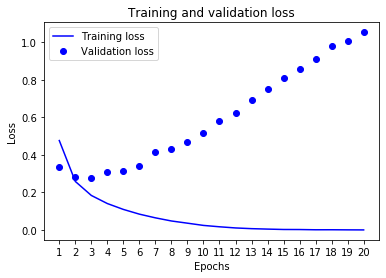

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss) + 1) # 0부터 시작이므로

plt.plot(epochs, loss, 'b', label = 'Training loss') # 'b'는 파란 실선
# x축을 eopchs으로, y를 loss로
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss') # 'bo'는 파란색 점
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

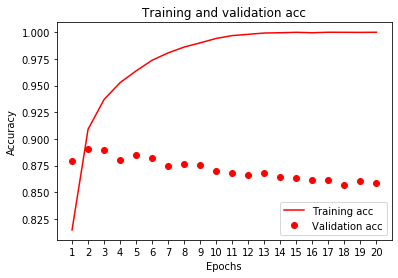

In [72]:
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+ 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'ro', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

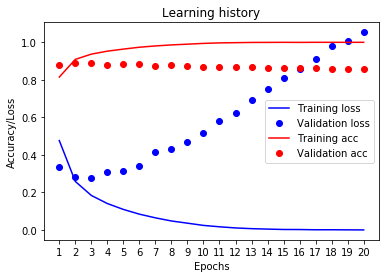

In [73]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(20 epochs): ', test_loss)
print('test acc(20 epochs): ', test_acc)

25000/25000 [==============================] - 4s 147us/sample - loss: 1.1527 - acc: 0.8451
test loss(20 epochs):  1.1526755175924301
test acc(20 epochs):  0.84512


7. (과대적합 되기 전까지) 모델 학습

In [75]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 3, # 2번이 최적의 교차점이지만 3번까지 한다
                   batch_size = 256,
                   validation_data = (X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 167us/sample - loss: 0.4567 - acc: 0.8174 - val_loss: 0.3347 - val_acc: 0.8802
Epoch 2/3
15000/15000 [==============================] - 2s 152us/sample - loss: 0.2522 - acc: 0.9153 - val_loss: 0.2774 - val_acc: 0.8908
Epoch 3/3
15000/15000 [==============================] - 2s 150us/sample - loss: 0.1820 - acc: 0.9369 - val_loss: 0.3033 - val_acc: 0.8815


In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(3 epochs): ', test_loss)
print('test acc(3 epochs): ', test_acc)
# loss는 0.8가량이 줄고 acc는 0.3정도 증가

25000/25000 [==============================] - 4s 145us/sample - loss: 0.3136 - acc: 0.8735
test loss(3 epochs):  0.3136331409072876
test acc(3 epochs):  0.87348


In [46]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 2, # 2번이 최적의 교차점이지만 3번까지 한다
                   batch_size = 256,
                   validation_data = (X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 3s 167us/sample - loss: 0.4528 - acc: 0.8230 - val_loss: 0.3257 - val_acc: 0.8806
Epoch 2/2
15000/15000 [==============================] - 2s 147us/sample - loss: 0.2506 - acc: 0.9118 - val_loss: 0.2760 - val_acc: 0.8899


In [47]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(2 epochs): ', test_loss)
print('test acc(2 epochs): ', test_acc)
# 역시 epochs=2가 최적의 예측 모델

25000/25000 [==============================] - 3s 133us/sample - loss: 0.2906 - acc: 0.8839
test loss(2 epochs):  0.29057659453392026
test acc(2 epochs):  0.88388


8. 학습된 모델로 새로운 데이터 예측

In [45]:
# 여러개 동시에 예측
result = model.predict(X_test)
print(result)

print()

# 하나씩 개 동시에 예측
sample = X_test[0]
result = model.predict(np.expand_dims(sample, axis = 0))
print(result)

[[0.19743171]
 [0.99980944]
 [0.87901163]
 ...
 [0.06497481]
 [0.06673741]
 [0.38956845]]

[[0.19743173]]


### (두번째 IMDB) earlystop, save training model

    경로 지정
    파일 이름 : model.h5
    하위경로 : ./model.h5
    상위경로 : ../moddel.h5 , ../../model.h5(상위의 상위)

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

전처리 및 데이터 분리

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
    return results

# 문장들을 일정한 크기의 벡터로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# 리스트 형태인 레이블을 벡터로 변환
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

X_valid = X_train[:10000]
X_train = X_train[10000:]
y_valid = y_train[:10000]
y_train = y_train[10000:]

모델 학습(조기 종료 콜백함수 버전)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 3),
                  # val_loss가 다시 상승하는 부분에서 stop해야하므로 monitoring
                  # patience는 감소 후 3번이내에 그보다 감소값이 안나오면 stop
                 ModelCheckpoint(filepath = 'model.h5', monitor = 'val_loss',
                                 save_best_only = True)]
                                # save best는 매번 저장이 아닌 최적값만 저장한다는 뜻

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 256,
                   validation_data = (X_valid, y_valid),
                   callbacks = callbacks_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.4494 - acc: 0.8174 - val_loss: 0.3169 - val_acc: 0.8835
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.2389 - acc: 0.9174 - val_loss: 0.2760 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1709 - acc: 0.9395 - val_loss: 0.2794 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1306 - acc: 0.9549 - val_loss: 0.3578 - val_acc: 0.8651
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1007 - acc: 0.9670 - val_loss: 0.3349 - val_acc: 0.8790


학습 과정 확인

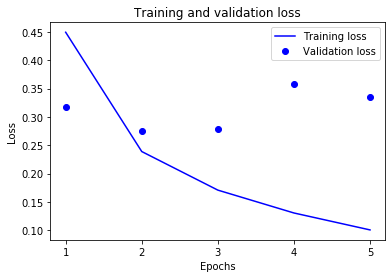

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'bo', label = "Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

최적 모델 불러오기

In [10]:
from keras.models import load_model

model = load_model('model.h5')
print('>> model load!!')

>> model load!!


성능 평가

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test acc: ', test_acc)

25000/25000 [==============================] - 4s 175us/step
test loss: 0.2915469863796234
test acc:  0.8834


기존 경로 하위에 새로운 폴더 생성 코드

In [15]:
import os
print(os.getcwd())
os.mkdir(os.getcwd() + "/testfile/")

C:\Users\Affinity\Documents


### multi classificcation (뉴스 토픽 분류)

topic : 46가지

각 토픽은 최소 10개의 샘플로 구성

train 8982
test 2246

1. 데이터 준비

In [1]:
from tensorflow.keras.datasets import reuters

import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

2. 데이터 전처리

In [5]:
train_data.shape

(8982,)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

3. 네트워크 정의

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


4. 모델 컴파일

In [10]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

5. 모델 학습

In [11]:
hist = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 381us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.4581 - acc: 0

6. 학습 과정 확인

Text(0, 0.5, 'Loss')

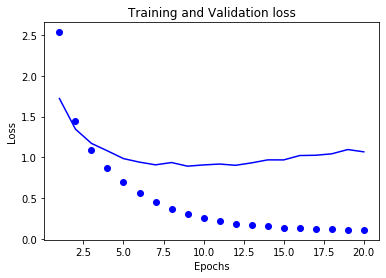

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

7. (과대적합 되기 전까지)모델 학습

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 157us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9


8. 학습된 모델로 새로운 데이터 예측

In [16]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [17]:
np.sum(predictions[0])

0.99999994

In [23]:
predictions[0]

array([1.07355772e-05, 8.40102803e-05, 2.69190386e-05, 9.71323252e-01,
       1.65277123e-02, 1.26749242e-07, 1.02780396e-04, 3.16078622e-05,
       3.71783273e-03, 2.32847242e-06, 3.30502517e-05, 1.61824992e-03,
       5.72379358e-05, 2.82240144e-05, 5.03424599e-06, 1.96415858e-05,
       9.31003131e-04, 2.06289871e-04, 2.99783802e-04, 1.26380927e-03,
       8.01188813e-04, 5.20672766e-04, 7.73418287e-06, 5.88526273e-05,
       1.29573864e-05, 3.28556140e-04, 2.63653806e-06, 2.88992796e-05,
       8.50909510e-06, 1.08353444e-04, 3.55155673e-04, 1.94270819e-04,
       1.19848346e-05, 4.24031423e-05, 3.67121902e-05, 2.29247871e-05,
       1.71511274e-04, 4.68818689e-05, 9.42619081e-05, 2.91092671e-04,
       3.91058711e-05, 4.72940417e-04, 2.12977898e-06, 3.40001134e-05,
       6.67289396e-06, 9.81394624e-06], dtype=float32)

In [18]:
np.argmax(predictions[0])

3

sparse_categorical_crossentropy

    one-hot encoding을 쓰지 않고 1,2,3,... 등으로 쓰고 싶을 때
    keras 자체적으로 알아서 인코딩하고 변환해서 출력해줌
    정수로 0부터 시작해야하며 category 갯수만큼 출력 갯수를 지정

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# 충분히 큰 층을 두어야 하는 이유 해보기

중간에 batch regularizer 넣어보기

In [26]:
##############################################################3
from keras import models
from keras import layers, regularizers
from keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 3.1100 - acc: 0.5455 - val_loss: 2.2349 - val_acc: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.9439 - acc: 0.7036 - val_loss: 1.8105 - val_acc: 0.7040
Epoch 3/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.5751 - acc: 0.7590 - val_loss: 1.6261 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.3431 - acc: 0.8047 - val_loss: 1.5105 - val_acc: 0.7550
Epoch 5/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.1662 - acc: 0.8385 - val_loss: 1.4187 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0239 - acc: 0.8603 - val_loss: 1.3468 - val_acc: 0.7850
Epoch 7/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.9050 - acc: 0.8824 - val_loss: 1.2759 - val_acc: 0.7990
Epoch

Text(0, 0.5, 'Loss')

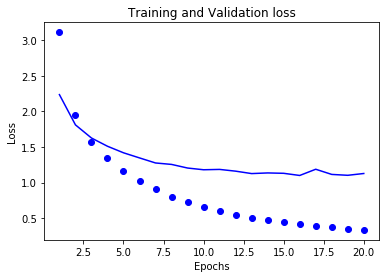

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 16,
         batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/16
7982/7982 [==============================] - 1s 163us/step - loss: 3.2033 - acc: 0.5244 - val_loss: 2.3250 - val_acc: 0.6160
Epoch 2/16
7982/7982 [==============================] - 1s 100us/step - loss: 1.9895 - acc: 0.6923 - val_loss: 1.8392 - val_acc: 0.6990
Epoch 3/16
7982/7982 [==============================] - 1s 99us/step - loss: 1.5898 - acc: 0.7631 - val_loss: 1.6388 - val_acc: 0.7460
Epoch 4/16
7982/7982 [==============================] - 1s 99us/step - loss: 1.3502 - acc: 0.8096 - val_loss: 1.4988 - val_acc: 0.7750
Epoch 5/16
7982/7982 [==============================] - 1s 98us/step - loss: 1.1699 - acc: 0.8426 - val_loss: 1.3995 - val_acc: 0.7960
Epoch 6/16
7982/7982 [==============================] - 1s 98us/step - loss: 1.0237 - acc: 0.8681 - val_loss: 1.3493 - val_acc: 0.7910
Epoch 7/16
7982/7982 [==============================] - 1s 99us/step - loss: 0.9066 - acc: 0.8913 - val_loss: 1.2981 - val_acc: 0.7980
Epoch

## binary classification(MNIST) panda,seaborn사용

    정확도 : TP+TN / 전체
    재현율(recall) : TP(재현해낸 P) / TP + FN (전체 P(실제 P))
    ex) 사진에서 틀리더라도 우선 얼굴을 인식하는게 중요하다면 재현율을 사용
    
    정밀도(precision) : 진짜 P / 모델이 P라고 예측한것
    (예측한게 얼마나 정밀한지) -> TP / FP + TP
    ex) 암인데 암이 아니라 하면 위험하므로 정밀도 높은게 중요하다면 정밀도 사용
    
    데이터의 클래스가 불균형할 떄 accuracy를 쓰면 안됨
    ex) binary인데 한쪽이 100개중 90개면 한쪽으로만 예측해도 정확도가 90% 됨
    recall/precision
    
    따라서, 정확도 몇%로 하겠다가 아닌 정밀도 또는 재현율을 몇프로로 하겠다
    라고 제안서를 써야함

In [32]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [33]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (waning)

tf.logging.set_verbosity(tf.logging.ERROR)

In [34]:
import numpy as np

np.random.seed(777)

1. 데이터 준비

In [35]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

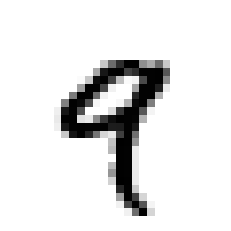

label:  9


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = X_train[4]
label = y_train[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.axis('off')
plt.show()
print('label: ', label)

In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_test_5)

[False False False ... False  True False]


2. 데이터 전처리

In [44]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255
# 벡터의 range가 0~255인데 y값을 one-hot 0,1로 할것이므로 정규화

3. 네트워크 정의 + 컴파일

In [47]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 5인지 아닌지 y_train_5를 만들었으므로 sigmoid
model.add(Dense(32, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# model.add(Dense(1, activation = 'softmax')) -> 0~9 분류할 때

model.compile(loss = 'binary_crossentropy', # 'mse'
             optimizer = 'sgd',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 26,209
Trainable params: 26,209
Non-trainable params: 0
_________________________________________________________________


4. 모델 학습

In [48]:
hist = model.fit(X_train, y_train_5, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 6s 102us/step - loss: 0.1676 - acc: 0.9404


In [49]:
loss, acc = model.evaluate(X_train, y_train_5, verbose = 0)
print(loss)
print(acc)

0.10070061321208874
0.96795


5. 분류 결과 분석

- 혼동 행렬(confusion matrix)

In [51]:
from tensorflow.keras.utils import to_categorical

y_pred_5 = model.predict(X_test).ravel()
y_pred_5 = y_pred_5 > 0.5
print(y_pred_5)
print(y_test_5)

[False False False ... False False False]
[False False False ... False  True False]


In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_pred_5) # pred는 value로 전달
print(cm)

[[9056   52]
 [ 254  638]]


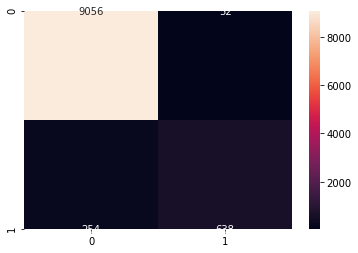

In [54]:
import pandas as pd
import seaborn as sns

df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')
# annot : argument를 써서 각 셀에 숫자를 ㄹ입력하겠다
# fmt : 'd'는 정수 형태로 숫자를 입력하겠다는 뜻

In [55]:
import numpy as np

y_pred_5 = model.predict(X_test).ravel()

print(y_pred_5)
print(y_test_5)

[4.4708550e-03 9.2341185e-02 1.4815301e-02 ... 1.0697067e-02 4.1004911e-01
 2.9566884e-04]
[False False False ... False  True False]


- Presision Recall 커브(curve)

[0.10382959 0.10372526 0.10373734 ... 1.         1.         1.        ]
[1.         0.99887892 0.99887892 ... 0.00224215 0.00112108 0.        ]
[3.5053492e-04 3.5327673e-04 3.5354495e-04 ... 9.7586930e-01 9.7621214e-01
 9.7695190e-01]
8542
8542
8541
10000


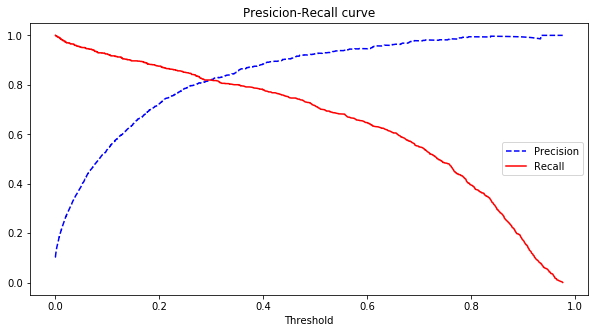

In [56]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_pred_5)
# pred 인자는 probability 값으로 전달
print(precisions)
print(recalls)
print(thresholds)
print(len(precisions))
print(len(recalls))
print(len(thresholds))
print(len(y_test_5))

plt.figure(figsize = (10, 5))
plt.title('Presicion-Recall curve')
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'r-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

- ROC 커브(curve)

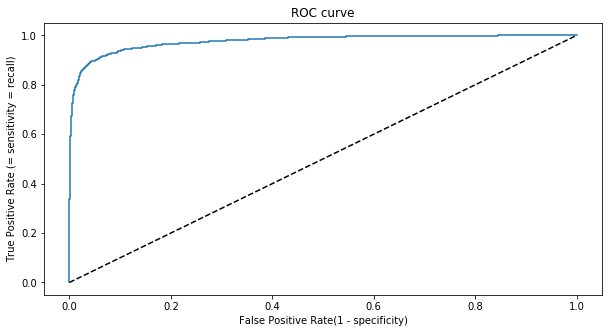

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_5)

plt.figure(figsize = (10, 5))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate (= sensitivity = recall)')
plt.show()

In [59]:
from sklearn.linear_model import Perceptron

perceptron = Sequential()
perceptron.add(Dense(1, input_shape = (28*28,), activation = 'sigmoid'))
perceptron.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['acc'])
perceptron.fit(X_train, y_train_5, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 6s 94us/step - loss: 0.1959 - acc: 0.9263


In [60]:
y_perceptron = perceptron.predict(X_test)
print(y_perceptron)

[[0.02809548]
 [0.13481477]
 [0.05086687]
 ...
 [0.03361288]
 [0.15542746]
 [0.00223947]]


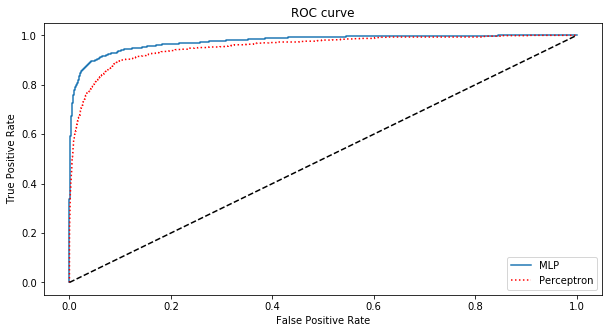

In [61]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test_5, y_pred_5)
fpr2, tpr2, thresholds2 = roc_curve(y_test_5, y_perceptron)

plt.figure(figsize = (10, 5))
plt.title('ROC curve')
plt.plot(fpr1, tpr1, label='MLP')
plt.plot(fpr2, tpr2, 'r:', label='Perceptron')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test_5, y_pred_5)
auc2 = roc_auc_score(y_test_5, y_perceptron)
print('AUC of MLP :', auc1)
print('AUC of Perceptron :', auc2)
# auc : roc곡선 아래 영역

AUC of MLP : 0.9761143556839601
AUC of Perceptron : 0.9538754305582634


    AUC는 다음 두 가지 이유로 이상적입니다.
        - AUC는 척도 불변입니다. AUC는 절대값이 아니라 예측이
          얼마나 잘 평가되는지 측정합니다.
        - AUC는 분류 임계값 불변입니다. AUC는 어떤 분류 임계값이
          선택되었는지와 상관없이 모델의 예측 품질을 측정합니다.
    하지만 특정 사용 사례에서 AUC의 유용성을 제한할 수 있다는 단점이 있습니다.
        - 척도 불변이 항상 이상적인 것은 아닙니다. 예를 들어 잘 보정된
          확률 결과가 필요한 경우가 있는데 AUC로는 이 정보를 알 수 없습니다.
        - 분류 임계값 불변이 항상 이상적인 것은 아닙니다.
          허위 음성(FN) 비용과 허위 양성(FP) 비용에 큰 차이가 있는 경우
          한 가지 유형의 분류 오류를 최소화하는 것은 위험할 수 있습니다.
          예를 들어 이메일 스팸 감지를 실행할 때 허위 양성(FP)의 최소화로 인해
          허위 음성(FN)이 크게 증가한다고 해도 허위 양성(FP) 최소화를
          우선시하고 싶을 수 있습니다.
          AUC는 이런 유형의 최적화에 유용한 측정항목이 아닙니다.

# opencv 실습

    filter_in_imageProcessing
    imshow(cmap) : 스칼라 데이터를 색상에 매핑하는 color map

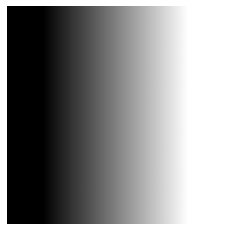

In [85]:
import cv2
import numpy as np

# 텍스트 이미지 불러오기
img = cv2.imread('C:/Users/Affinity/Desktop/study/Module05/lena.jpg', cv2.IMREAD_GRAYSCALE)

# 필어(filter) 정의
vKernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
hKernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

# 컨볼루션(convolution) 연산
vertical = cv2.filter2D(img, -1, vKernel)
horizontal = cv2.filter2D(img, -1, hKernel)
both = vertical + horizontal

# 필터 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(vKernel, interpolation = 'bilinear', cmap = 'gray')
plt.axis('off')
plt.show()

# 컨볼루션 결과 출력
cv2.imshow('original', img)
cv2.imshow('vertical', vertical)
cv2.imshow('horizontal', horizontal)
cv2.imshow('both', both)

cv2.waitKey(0)
cv2.destroyAllWindows()

edge filter


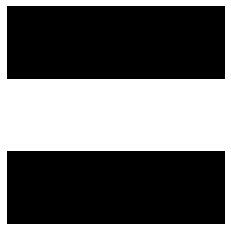

In [86]:
# 필터(filter) 정의 
vKernel = np.array([[-1, 2, -1],
                    [-1, 2, -1],
                    [-1, 2, -1]])

hKernel = np.array([[-1, -1, -1],
                    [ 2, 2, 2],
                    [-1, -1, -1]])

# 컨볼루션(convolution) 연산
vertical = cv2.filter2D(img, -1, vKernel)
horizontal = cv2.filter2D(img, -1, hKernel)
both = vertical + horizontal

# 필터 시각화
import matplotlib.pyplot as plt
%matplotlib inline

print('edge filter')
plt.imshow(hKernel, cmap='gray')
plt.axis('off')
plt.show()


# 컨볼루션 결과 출력
cv2.imshow('original', img)
cv2.imshow('vertical', vertical)
cv2.imshow('horizontal', horizontal)
cv2.imshow('both', both)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 02. Tensorflow를 이용한 다층신경망
    
        01. 선형 회귀

Hypothesis
$$ H(X) = XW $$

Cost function
$$ cost(W) = \frac{1}{m} \sum_{i=1}^m (H(X) - y_i )^2 $$

Gradient descent
$$ W = W - \alpha \frac{\partial}{\partial W} cost(W) $$

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model

y =  [[8.56287425]] x  +  [15.04491018]


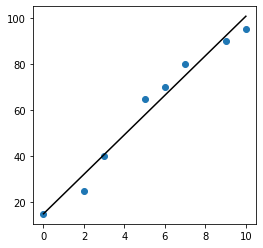

In [45]:
# p. 863
data = np.array([[0,2,3,5,6,7,9,10],
        [15,25,40,65,70,80,90,95]])

model = linear_model.LinearRegression()
x = data[0].reshape(-1,1)
y = data[1].reshape(-1,1)
model.fit(x, y)
print("y = ", model.coef_, "x", " + ",  model.intercept_)

x = np.linspace(0,10,10)

plt.figure(figsize = (4,4))
plt.scatter(data[0], data[1]) # = plt.plot(x, y, 'p')
plt.plot(x, x*model.coef_[0] + model.intercept_, color = 'k')
plt.show()

$$ cost = \frac{1}{m} \sum_{i=1}^m (H(x_i) - y_i )^2 $$
$$ cost(W, b) = \frac{1}{m} \sum_{i=1}^m (Wx + b - y_i )^2 $$

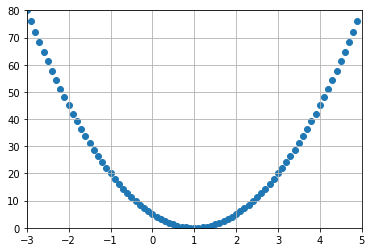

In [68]:
x = np.arange(-5.0, 5, 0.1)
plt.scatter(x, 5*x**2-10*x + 5)
plt.axis([-3,5,0,80])
plt.grid()
plt.show()

$$W값\, 갱신\, ( \alpha \, -> \, Learning\, Rate )$$

$$ W \, := \, W - \alpha \frac{\partial}{\partial W} cost(W) $$

$$ W \, := \, W - \alpha \frac{1}{m} \sum_{i=1}^m (Wx_i - y_i)x_i $$

In [73]:
data = np.array([[73,93,89,96,73],
               [80,88,91,98,66],
               [75,93,90,100,70],
               [152,185,180,196,142]])
data_df = pd.DataFrame({'quiz1' : [73,93,89,96,73],
           'quiz2' : [80,88,91,98,66],
           'middle' : [75,93,90,100,70],
           'final' : [152,185,180,196,142]})
data_df

,quiz1,quiz2,middle,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


$$ \begin{bmatrix} 73&80&75\\93&88&93\\89&91&90\\96&98&100\\73&66&70 \end{bmatrix} \times \begin{bmatrix} w_1\\w_2\\w_3 \end{bmatrix} = \begin{bmatrix}  73w_1+80w_2+75w_3\\93w_1+88w_2+93w_3\\89w_1+91w_2+90w_3\\96w_1+98w_2+100w_3\\73w_1+66w_2+70w_3 \end{bmatrix} \; \Rightarrow \; H(X) = XW $$

$$H(x_1,x_2,x_3) = w_1x_1 + w_2x_2 + w_3x_3 + b \quad \rightarrow \quad H(X) = XW$$

$$ cost(W) = \frac{1}{m} \sum_{i=1}^m (H(x_{1i},x_{2i},x_{3i} ) - y_i)^2 $$

$$ \Downarrow $$

$$ \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} \times \begin{bmatrix} w_1 \\w_2 \\ w_3 \end{bmatrix} = \begin{bmatrix} w_1x_1 + w_2x_2 + w_3x_3 \end{bmatrix} $$


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 02. Tensorflow를 이용한 다층신경망
    
        02. 로지스틱 회귀

Hypothesis
$$ H(X) = \frac{1}{(1+e^{-XW})} $$

Cost function
$$ cost(W) = -\,\frac{1}{m} \sum y\,log(H(X)) + (1-y)\,log(1-H(X)) $$

Gradient descent
$$ W = W - \alpha \frac{\partial}{\partial W} cost(W) $$

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 02. Tensorflow를 이용한 다층신경망
    
        03. 소프트맥스 분류기

    sigmoid : binary classification
    Softmax : multinomial classificarion

$$ Z_A = \begin{bmatrix} x_1&x_2\end{bmatrix}\begin{bmatrix}W_{A1}\\W_{A2}\end{bmatrix} = \begin{bmatrix}x_1W_{A1} + x_2W_{A2}\end{bmatrix}$$

$$ Z_B = \begin{bmatrix} x_1&x_2\end{bmatrix}\begin{bmatrix}W_{B1}\\W_{B2}\end{bmatrix} = \begin{bmatrix}x_1W_{B1} + x_2W_{B2}\end{bmatrix}$$

$$ Z_C = \begin{bmatrix} x_1&x_2\end{bmatrix}\begin{bmatrix}W_{C1}\\W_{C2}\end{bmatrix} = \begin{bmatrix}x_1W_{C1} + x_2W_{C2}\end{bmatrix}$$
$$\Downarrow$$
$$\begin{bmatrix}W_{A1}&W_{A2}\\W_{B1}&W_{B2}\\W_{C1}&W_{C2}\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}x_1W_{A1} + x_2W_{A2}\\x_1W_{B1} + x_2W_{B2}\\x_1W_{C1} + x_2W_{C2}\end{bmatrix} = \begin{bmatrix}Z_A\\Z_B\\Z_C\end{bmatrix}$$



$$ H_A(X) = \frac{1}{(1+e^{-Z_A})} = \hat{y}_A $$

$$ H_B(X) = \frac{1}{(1+e^{-Z_B})} = \hat{y}_B $$

$$ H_C(X) = \frac{1}{(1+e^{-Z_C})} = \hat{y}_C $$
$$\Downarrow$$
$$s(z_i) = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}$$

Hypothesis
$$H(X) = \frac{e^{XW_i}}{\sum_{j=1}^k e^{XW_j}}$$
Cost function
$$D(H,y) = - \sum_{i=1}^k y_i log(H_i (X)) \qquad cost(W) = \frac{1}{m} \sum_{j=1}^m D(H,y)$$
$$\Downarrow$$
$$ cost(W) = - \frac{1}{m} \sum_{j=1}^m \sum_{i=1}^k y_i log(H_i(X)) k=분류갯수$$
$$ sigmoid를\, 다\, 씌운\, 값의\, 확률들을\, 더하면\, 1$$

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 03. 다층신경망 한계요인의 수식적 분석
    
        01. 오차역전파

    각 파라메터별로 Loss에 대한 그래디언트를 구한 뒤 그래디언트들이 향한 쪽으로 파라메터들을 업데이트

Gradient descent p.892
$$w = w - \alpha \frac{\partial}{\partial w} cost(w)$$

$$ \Downarrow$$

$$w = w - \alpha \frac{\partial E}{\partial w}$$
  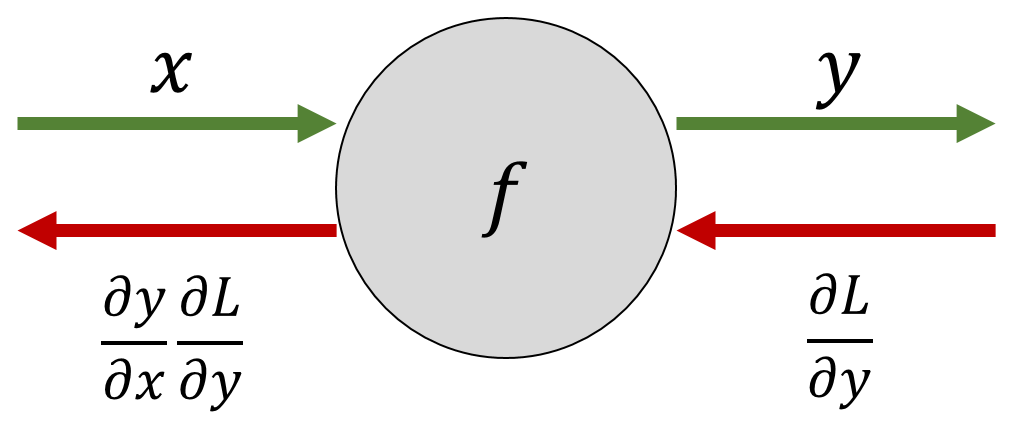

one_hot_encoding

     A = [1 0 0]
     B = [0 1 0]
     C = [0 0 1]

cost, loss, objective 개념 정리
    - 손실 함수(loss function) : 실제 값과 예측 값 간의 차이를 계산하기 위한 함수
    - 비용 함수(cost function) : m개 평균 loss(손실)
    - 목적 함수(objective function) : 최적화하기 위한 대상 함수를 의미
        (오류를 최소화하거나 이익을 최대화하는 것 모두 가능)
        (ex) SVM의 margin을 최소화 하는 것이 목적 함수

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 03. 다층신경망 한계요인의 수식적 분석
    
        02. 기울기 소실을 해결하기 위한 기법들

    w = 0으로 초기화하지 않는 이유 (random한 값으로 하는 이유(-1 ~ 1)
    - w가 0이라면 unit(node)가 여러개 있어도 결국 1개있는 것과 같다
    
    가장 좋은 w의 범위
    sigmoid 그래프를 볼 떄 기울기가 손실되지 않는 범위 내
   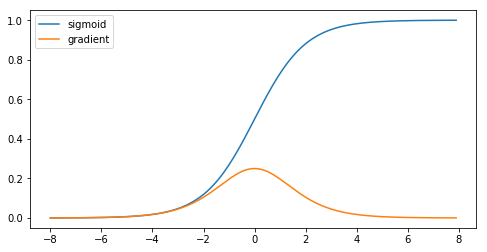

    p.897 -> 역전파 과정에서 미분시 sigmoid 최상단(거의 0에 근사한) 값에 걸리면
    W = W - a x 0 이되므로 weight의 변화가 없게됨 (기울기 소실)
    이렇게 되면 가중치 갱신이 안되므로 학습이 잘 되지 않음
    대처법 (vanishing gradient)
    1. Activation function
        Sigmoid -> ReLU
    2. Initialization
    3. optimizer 변경

Activate function (활성화함수 종류)
    - sigmoid
    - relu
    - tanh -> 가중치 초기화(일반적으로 Xavior)만 잘해줘도 최고의 성능을 보임
    - ERU (가중치 초기화시 relu는 음수부분이 죽기때문에 살려두는 방법)
    - Leaky ReLU
    (이하는 검색해서 찾은 내용)
    - Softsign (성능이 좋은편 -> error가 낮아지다 수렴될 확률)

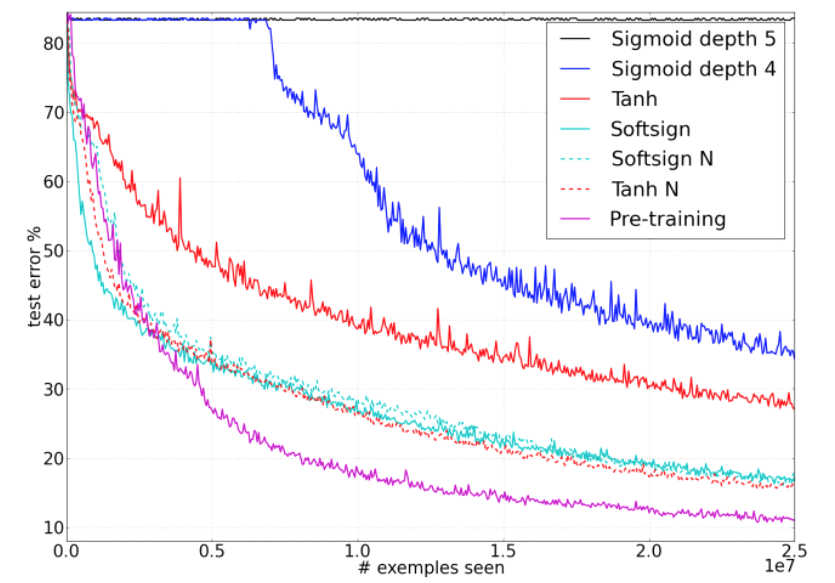

Initialization (가중치 초기화) p.898

    (fan in : input layer의 Neuron 갯수)
    (fan out : output layer의 Neuron 갯수)
    - RBM(Restricted Boltzmann Machine)
        2개 layer에 대해 초기값을 결정할 때까지 반복하고, 다음 번 2개에 대해
        다시 반복하고. 이것을 마지막 layer까지 반복하는 방식.
        (forward) 현재 layer에 들어온 x값에 대해 weight을 계산한 값을
        다음 layer에 전달한다. (backward) 이렇게 전달 받은 값을 이번에는
        거꾸로 이전(현재) layer에 weight 값을 계산해서 전달.
        최초 전달된 x와 예측한 값(x hat)의 차이가 최소가 되는 weight을 발견
    - Xavier initialization (default이며 1번 방법론)    
$$ \frac{normal-random}{\sqrt{fan_{in}}} $$
        1. 평균이 0, 분포가 sigma인 정규분포
$$ \sigma = \sqrt \frac{2}{n_{input} + n_{output}} $$
        2. [-r, r] 사이의 균등분포
$$ r = \sqrt \frac{6}{n_{input} + n_{output}} $$
    - He initialization
$$ \frac{normal-random}{\sqrt{\frac{fan_{in}}{2}}} $$
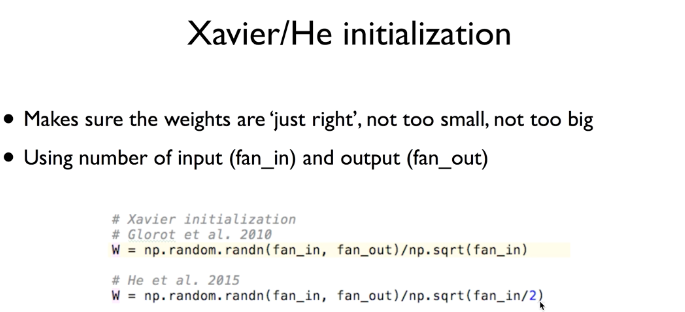

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 03. 다층신경망 한계요인의 수식적 분석
    
        03. 과대적합

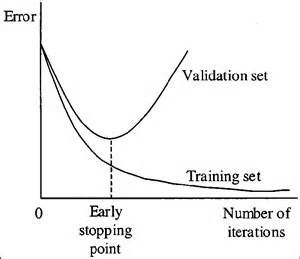

과대적합을 피하는 방법
    - 더 많은 훈련 데이터를 모으거나 regularizatoin
    - cross validation
    - 대표적인 ragularization 기법들
        - 모델 용량(capacity) 줄이기(모델 파라미터 개수를 줄임)
            - 단, underfitting되지 않을 적절한 용량을 찾는 것이 중요
        - 가중치 규제(weight regularization)
            - L1 regularization
$$ cost = \frac{1}{m} \sum_{i=1}^m (H(x_i) - y_i)^2 + \lambda \sum |w| $$
            - L2 regularization(딥러닝에서 weight decay와 동일함)
$$ cost = \frac{1}{m} \sum_{i=1}^m (H(x_i) - y_i)^2 + \lambda \sum w^2 $$

            (가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문에,
            가중치가 클수록 큰 패널티를 부과하여 오버피팅을 억제하는 방법)
        - dropout(=ensemble learning)
          (keras에서는 drop이므로 0.7 -> 70%를 죽이겠다)
          (tensor에서는 keep_prop이므로 0.7 -> 70%를 사용하겠다)
        - early stopping
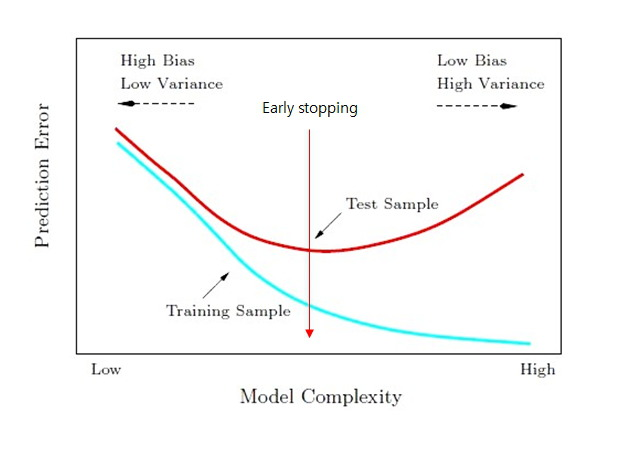
        - data augmentation (데이터 증강)
          (회전, 이동, 확대, 축소, 밝기 변화 등)

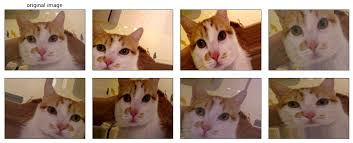

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 03. 다층신경망 한계요인의 수식적 분석
    
        04. 케라스를 이용한 딥러닝 개발

일반적인 케라스 작업 순서

    1. 훈련 데이터 정의
    2. 네트워크 정의
    3. 손실 함수, 옵티마이저, 성능 지표 설정
    4. 모델 학습
    5. 모델 평가 및 분석

2가지 네트워크 구현 방식

    Sequential 클래스
     - 층(layer)를 순차적으로만 쌓은 네트워크에 적합
    함수형(function) API
     - 병렬 층이 존재하고 입력 또 출력이 여러 개인 경우 개발
     - Dense( )(input) 의 형태

경사하강법 종류 p.904

    - 배치 경사 하강법(batch gradient descent)
        - 매 반복마다 전체 훈련 데이터셋을 사용하여 가중치 갱신
    - 확률적 경사 하강법(stochastic gradient descent, SGD)
        - 매 반복마다 한 개의 sample을 사용하여 가중치 갱신
    - 미니 배치 확률적 경사 하강법(mini-batch stochastic gradient descent
        매 반복마다 mini-batch 단위로 가중치 갱신
        (메모리 사용량이 크면 batch size를 줄이고 사용)
        
$$ w = w - \alpha \sum_{i = 1}^m (wx_i - y_i)x_i $$

    가중치 갱신식에서 SGD는 m이 1이란 소리
    
    - batch size 지정 -> batch가 하나 끝날 떄마다 w를 갱신
    - 이말은 batch 지정 안할 시 전체 데이터셋을 다 돈 후 가중치 갱신

SGD의 여러 변종

    - Nesterov, Adam, RMSProp, Adagrade, Adadelta 등 (optimizer)
      (Nesterov : 방향을 잘 찾아감)
      (Adagrade : step을 가속도를 이용해 효율적으로 사용)
      (RMSProp : 최근에 사용햿던 가속을 이용함)
      (Adam : 방향 and step을 모두 겸비. 그래서 주로 Adam을 사용)
        모멘텀(momentum) -> gradient뿐만 아니라 속도를 고려하여 가중치 갱신

In [ ]:
# momentum
past_velocity = 0
momentum = 0.1 # 모멘텀 상수
while loss > 0.01: # > 0.01: # 최적화 반복 루프
    w, loss, gradient = get_current_parameters()
    velocity = momentum * past_velocity - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_valocity = velocity
    update_parameter(w)

keras에서 사용하는 loss 종류

    - binary crossentropy
    - categorical crossentropy
    - MSE
    - CTC(Connection Temporal Classification)

하이퍼파라미터 vs 모델파라미터

    하이퍼파라미터(hyperparameter)
      - 학습률(learning rate)
      - 모멘텀(momentum)
      - 배치 사이즈(batch size)
      - 드롭아웃(drop out) 비율 등
    모델 파라미터(model parameter) = 가중치(weight) = 학습가능한 파라미터(learnable parameter)
      - 학습 동안 경사 하강법을 이용해 모델이 스스로 학습하는 파라미터

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module5

    -Part 04. 손글씨 예제를 통한 딥러닝 이해
    
        01. 데이터 분리 및 처리

    training : test = 8 : 2
    분리 시 random하게

    정규화 방법 : min-max[0,1], regularization[-s,s] (95% 표준편차 이내)
    - 중요 : training에서 사용한 min,max,mean,std를 고대로 test에도 적용
    ( 각각 사용시 비교 적용이 불가능해짐)

    feature engineering(특성공학)
     - 적은 데이터 또는 차원(연산량)으로도 학습 가능
     - 해당 도메인(domain)에 대한 지식이 있을 때 가능
         ex) 시계 이미지 분류 시 시간을 다 넣는게 아니라 각도나 좌표값
             정도만 넣어줌으로써 효율적인 연산이 가능하도록